<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

You work for a real estate company interested in using data science to determine the best properties to buy and re-sell. Specifically, your company would like to identify the characteristics of residential houses that estimate the sale price and the cost-effectiveness of doing renovations.

There are three components to the project:

1. Estimate the sale price of properties based on their "fixed" characteristics, such as neighborhood, lot size, number of stories, etc.


2. Estimate the impact of possible renovations to properties from the variation in sale price not explained by the fixed characteristics.  

3. Bonus Question: Determine the features in the housing data that best predict "abnormal" sales (foreclosures, etc.).

#### The full description of the data features can be found in a separate file in the project-3 repo: data_description.txt

#### For question one and two you will likely need to test different models to arrive at your "best model" for each question. This should not be an exhaustive exercise as the cleaning and eda ahead is significant enough by itself.  



#### This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).



In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# set the DF disply to show all columns for EDA
pd.set_option("display.max_columns", None)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---
 

#### Q1. You need to build a reliable estimator/model for the price of the house given characteristics of the house that CANNOT be renovated. 


#### Some examples of fixed and renovateble featurs include:

#### Fixed features
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

 

#### Renovateable features:(these are some examples of renovateable features that you will include in your model for question two)
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

 

### **Your goals for question one:**
 - Perform any cleaning, feature engineering, and EDA you deem necessary.
 - Be sure to remove any houses that are not residential from the dataset.
 - Identify **fixed** features that can predict price.
 - Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
 - Characterize your model. How well does it perform? What are the best estimates of price?

 

In [3]:
# Load the data
house = pd.read_csv('./housing.csv')

print(house.shape)
house.head(2)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


---------------------------------------------------
## Part 1.0: EDA

 - *mostly carried out while listening to EDM*
---------------------------------------------------

In [4]:
# Check what the different Zoning values are present in the data for the Residential vals
house.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [5]:
# what yr range is the data for
print(house['YrSold'].min(), house['YrSold'].max())

2006 2010


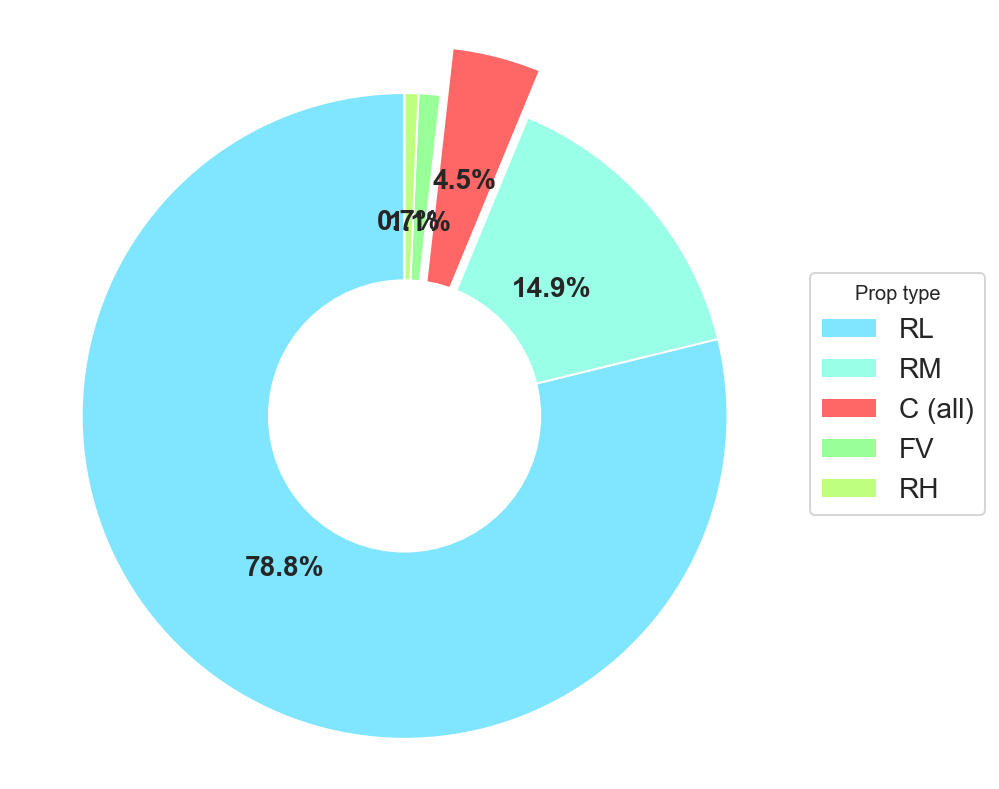

<Figure size 432x288 with 0 Axes>

In [6]:
# make a tasty plot for the ol' preso, plus learn how to pie chart stuff

labels = list(house.MSZoning.unique())
sizes = list(house.MSZoning.value_counts())
explode = (0, 0, 0.15, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['#80e5ff','#99ffe6','#ff6666','#99ff99','#bfff80']

fig1, ax1 = plt.subplots(figsize=(7,7))
wedges, texts, autotexts = ax1.pie(sizes, explode=explode, autopct='%1.1f%%',
                                   shadow=False, startangle=90, textprops={'fontsize': 14},
                                  colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#draw circle
centre_circle = plt.Circle((0,0),0.42,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.legend(wedges, labels, title="Prop type", loc="center left",
           prop={'size': 14}, bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=14, weight="bold")

plt.show()

plt.savefig('prop_share.png');

In [7]:
## Drop all non residential properties
# 'Floating Residential' understood to be a flexible zoning concept that covers potential residential zones so is
# maintained in the dataset

house_res = house.copy()
house_res = house_res.drop(house_res[(house_res['MSZoning'] == 'C (all)') | (house_res['MSZoning'] == 'I') | (house_res['MSZoning'] == 'A')].index)
print(house_res.shape)
house_res.head()

(1450, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Discussion notes:
1. There are a plethora of 'NA' values in the original CSV doc that Pandas auto converted to 'NaN' values.
2. A variety of Features actually include 'NA' as a legit input value, so should be maintained in these categories.
    - Pandas CSV read can be forced to maintain all 'NA's however this can affect the numerical columns (converts all values to 'objects')
3. Method that has been employed to retain 'NA' where needed;
    - Let Panda's convert all NA values to 'NaN'
    - identify the Features where 'NA' is legitimate and apply function to replace 'NaN' with 'NA' value

In [8]:
# write a function to convert unwanted 'NaN' vals
def na_chk(x):
    x= str(x)
    if x == 'nan':
        return 'NA'
    else:
        return x

In [9]:
# create list of feature variables where 'NA' is appropriate data based on the description file
feat_wt_na = ['Alley', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','FireplaceQu',
              'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

# Loop over the list of Features with legit NA vals and apply modification function
for i, j in enumerate(feat_wt_na):
    house_res[j] = house_res[j].apply(func=na_chk)

In [10]:
# check on result
house_res.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


### Discussion notes:
 - Need to address remaining 'NA' / NaN values in the dataset.
 - All remaining NA values will represent missing data and needs to be dealt with.

In [11]:
# Print out the number of NaN counts for each column if it is greater than 0
for i,j in enumerate(house_res.columns.values):
    if house_res[j].isna().sum() > 0:
        print("Feature:",j," - num null vals =",house_res[j].isna().sum())
    

Feature: LotFrontage  - num null vals = 259
Feature: MasVnrType  - num null vals = 8
Feature: MasVnrArea  - num null vals = 8
Feature: Electrical  - num null vals = 1
Feature: GarageYrBlt  - num null vals = 79


In [12]:
house_res.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [13]:
# slice out the 'nan' values in Masonary Veneer Type
mas_chk = house_res[(house_res.MasVnrType != 'BrkFace') & (house_res.MasVnrType != 'None') & (house_res.MasVnrType != 'Stone') & (house_res.MasVnrType != 'BrkCmn')]
mas_chk[['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [14]:
## Check on the Garage properties

# create slice where GarageType = NA and count the corresponding 'NA' in the year built column
gar_chk = house_res[(house_res['GarageType'] == 'NA')]
print(gar_chk['GarageYrBlt'].isnull().sum())            # create sum of NA vals
gar_chk[['GarageType','GarageYrBlt']].head()

79


,GarageType,GarageYrBlt
39,NA,NaN
48,NA,NaN
78,NA,NaN
89,NA,NaN
99,NA,NaN


In [15]:
## Check Lot Frontage missing vales
# check which types of bldg have zero inputs and count
house_res[house_res['LotFrontage'].isnull()].groupby(['MSSubClass']).count()

,Id,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20,99,99,0,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,98,98,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,96,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99
30,6,6,0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,4,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
40,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
50,16,16,0,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
60,69,69,0,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,68,68,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69
70,5,5,0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
75,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
80,20,20,0,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
85,6,6,0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


### Discussion notes:

1. The null `MasVnrType` & `MasVnrArea` entries coincide on the same 8 data points.
    - **Resoultion:** No clear replacement value to impute. Will drop the data points as only 8 rows.
    
    
2. The null `Electrical` entry is only 1 unknown.
    - **Resoultion:**  No clear replacement value to impute. Will drop data point.
    
    
3. For the `GarageYrBlt` feature, the null values conicide with properties with no garage present.
    - **Resoultion:**  impute with zero for missing vals.
    
    
4. The null values for `LotFrontage` are numerous and occur for the majority of building types. The is no clear pattern  as to why  the values are missing. It would appear that these are "real" missing inputted values. Given the volume of missing data, it would be too costly to the assessment to lose the data points. It is assumed that all property types listed will include some frontage to the lots, so a non-zero numerical input makes more sense.
    - **Resoultion:**  impute with mean avg yr for missing vals.


In [16]:
# make a fres copy of the data set prior to further cleaning.
house_clean = house_res.copy()

In [17]:
# Drop null 'Electrical' and masonary related data
house_clean = house_clean.drop(house_clean[(house_clean['MasVnrType'].isnull()) | (house_clean['Electrical'].isnull())].index)
house_clean.shape

(1441, 81)

In [18]:
# modify all 'NaN' with the average values for the respective Features

# impute the mean value for the LotFrontage
house_clean['LotFrontage'].fillna(value=np.mean(house_clean['LotFrontage']), inplace=True)

# a zero input for the Garage area makes sense given that the 'NA' values align with 'No Garage'
house_clean['GarageYrBlt'].fillna(value=0, inplace=True)


In [19]:
# check that the imputations worked
house_clean['GarageYrBlt'].isnull().sum(), house_clean['LotFrontage'].isnull().sum()

(0, 0)

In [20]:
house_clean.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [21]:
# check for any homogeneous Features
# Print out the value counts for each Feature where there are a small N# of unique entries
listy=[]

for i in range(len(house_clean.columns)):
    listy = house_clean[house_clean.columns[i]].value_counts().values
    perc = house_clean[house_clean.columns[i]].value_counts(normalize=True).values.max()*100
    if len(listy) < 4:
        print(house_res.columns[i],":",listy, "% of largest grp:", round(perc,2))

Street : [1437    4] % of largest grp: 99.72
Alley : [1353   50   38] % of largest grp: 93.89
Utilities : [1440    1] % of largest grp: 99.93
LandSlope : [1366   62   13] % of largest grp: 94.8
CentralAir : [1352   89] % of largest grp: 93.82
BsmtHalfBath : [1360   79    2] % of largest grp: 94.38
HalfBath : [901 528  12] % of largest grp: 62.53
PavedDrive : [1326   85   30] % of largest grp: 92.02


### Discussion notes:
1. Both `Utilities` and `Street` are very homogenous, i.e. there is negligible variation in the data - seen by the largest sub-class making up +99% of the data series. As such they will not add any value to the models prediction power.
    - **Resolution:** drop these features completely.
    
    
2. Other data series to exhibit +90% proportions of the largest sub-class. These may also not add predictive power but will leave in the dataset and re-visit if needs be.

In [22]:
# drop the homogenous Features
house_clean.drop(columns=['Utilities', 'Street'], inplace=True)

In [23]:
print(house_clean.shape)    # check current DS shape
house_clean.head()

(1441, 79)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,NA,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,NA,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,NA,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


### Discussion notes:
 - Will look at correlations between the Features.

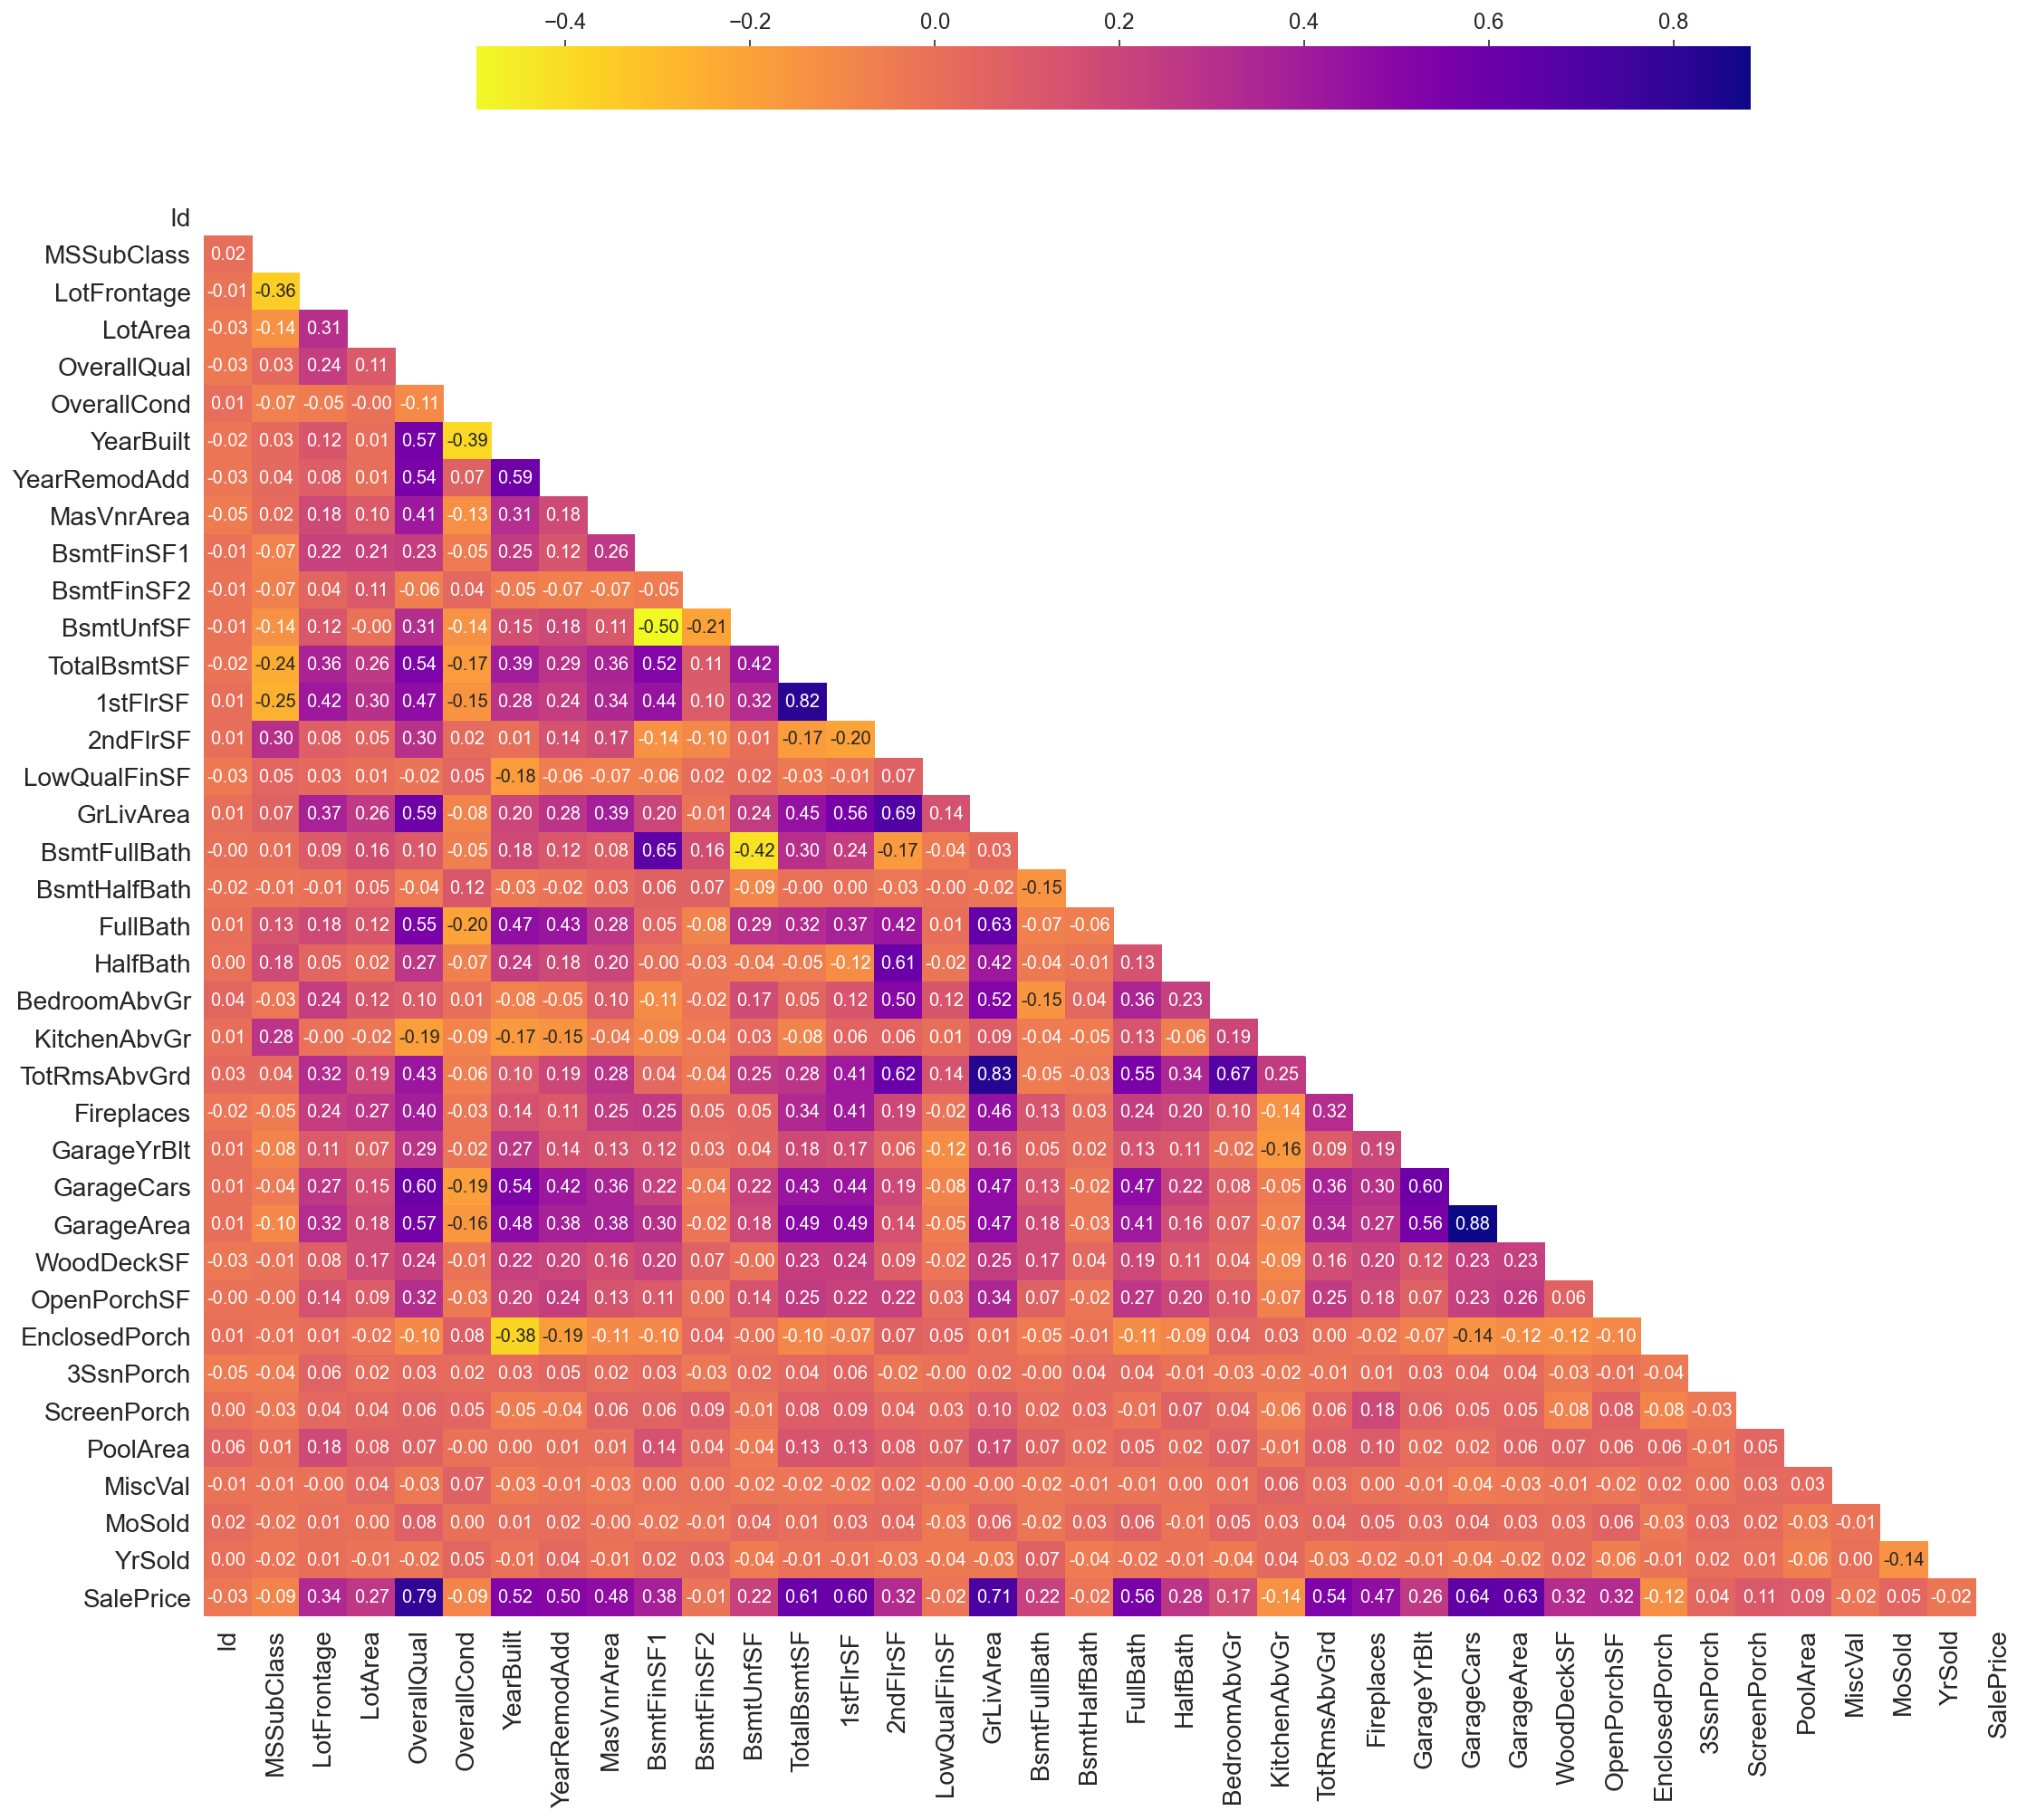

In [24]:
# Plot the correlations as a heatmap
mask = np.triu(np.ones_like(house_clean.corr(), dtype=bool))

fig, axs = plt.subplots(figsize=(18,18))
res = sns.heatmap(house_clean.corr(), 
            cmap= sns.color_palette('plasma_r', as_cmap=True),
            fmt=".2f", 
            annot=True,
            annot_kws={"fontsize":10},
            cbar_kws={"shrink": .7, 'use_gridspec':False, 'location': "top"},
            mask = mask
            )
#modify the axis labels
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)

cbar = axs.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

plt.savefig('corr.png')
plt.show()

### Discussion notes:

High correlations noted between the Features listed below. Will drop conflict to reduce correlations in Feature matrix.
High correlation taken to be > 0.8. Some moderate correlations (~|0.5-0.8|) may need to be revisited.

---------
- **keep** 1stFlrSF: First Floor square feet
- **drop** TotalBsmtSF: Total square feet of basement area

---------
- **drop** TotRmsAbvGrd: Total rooms above grade (does not include bathrooms.
- **keep** GrLivArea: Above grade (ground) living area square feet

---------
- **drop** GarageCars: Size of garage in car capacity
- **keep** GarageArea: Size of garage in square feet

In [25]:
# drop the highly correlated Features
house_clean.drop(columns=['TotalBsmtSF', 'TotRmsAbvGrd','GarageCars'], inplace=True)
house_clean.shape

(1441, 76)

### Discussion notes:
 - Check for outliers in some of the numerical continuous data.

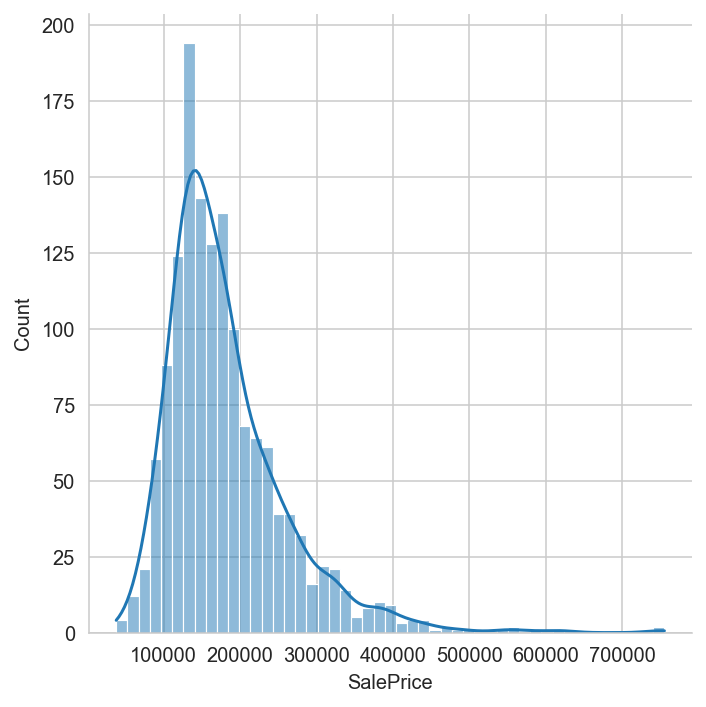

In [26]:
# check the distribution of the Target variable, i.e. Sales Price
sns.displot(house_clean['SalePrice'], kde=True);

In [27]:
# Target variable is right skewed. Outliers may affect the performance of the model

# Check the 99th%-ile value
q = house_clean['SalePrice'].quantile(0.99)
q

439511.9999999999

In [28]:
# drop the top 1% of house sales based on SalePrice 
house_clean = house_clean[house_clean['SalePrice'] < q]     # slice out all rows below the %ile val and re-assign
house_clean.reset_index(drop=True, inplace=True)            # reset indices
house_clean.shape           #check on the remaining data rows

(1426, 76)

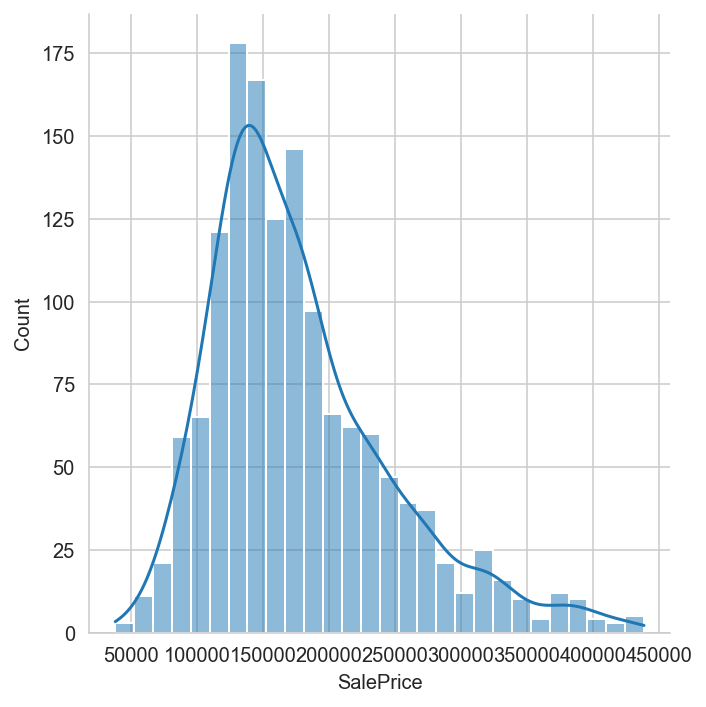

In [29]:
# check modified target variable
sns.displot(house_clean['SalePrice'], kde=True);

136.25


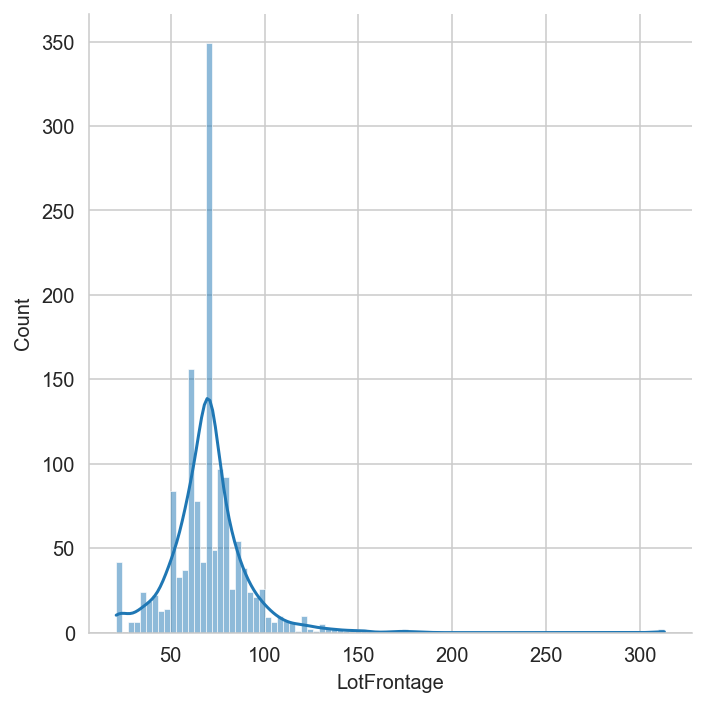

In [30]:
# check the distribution of the Lot Frontage
print(house_clean['LotFrontage'].quantile(0.99))  # Check and print the 99th%-ile value
sns.displot(house_clean['LotFrontage'], kde=True);

In [31]:
q_lf = house_clean['LotFrontage'].quantile(0.99)
house_clean = house_clean[house_clean['LotFrontage'] < q_lf]     # slice out all rows below the %ile val and re-assign
house_clean.reset_index(drop=True, inplace=True)            # reset indices
house_clean.shape

(1411, 76)

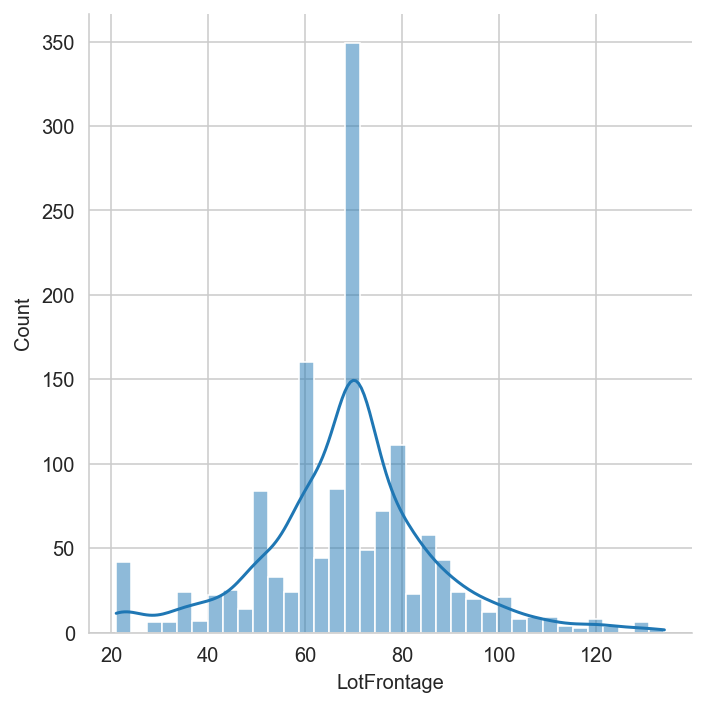

In [32]:
sns.displot(house_clean['LotFrontage'], kde=True);

34431.3000000002


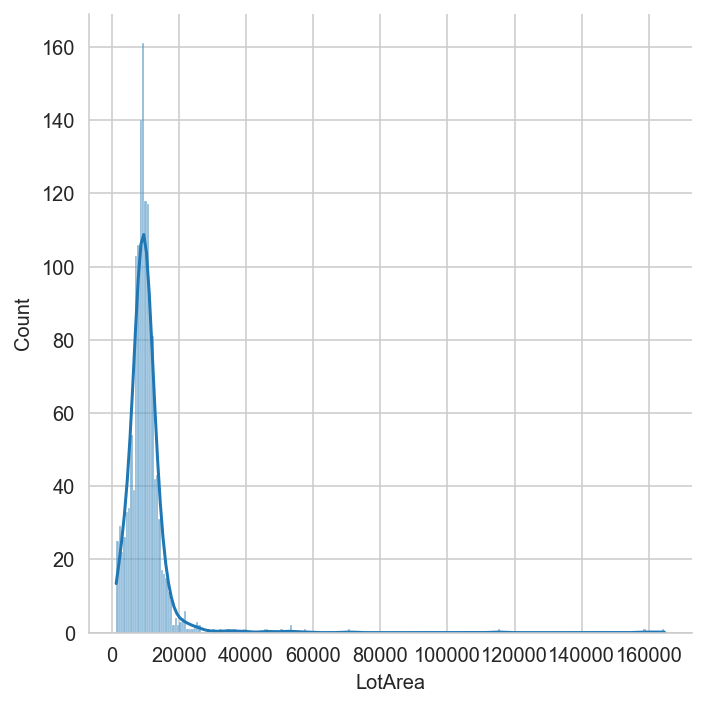

In [33]:
# check the distribution of the Target variable, i.e. Sales Price
print(house_clean['LotArea'].quantile(0.99))  # Check and print the 99th%-ile value
sns.displot(house_clean['LotArea'], kde=True);

In [34]:
q_la = house_clean['LotArea'].quantile(0.99)
house_clean = house_clean[house_clean['LotArea'] < q_la]     # slice out all rows below the %ile val and re-assign
house_clean.reset_index(drop=True, inplace=True)            # reset indices
house_clean.shape

(1396, 76)

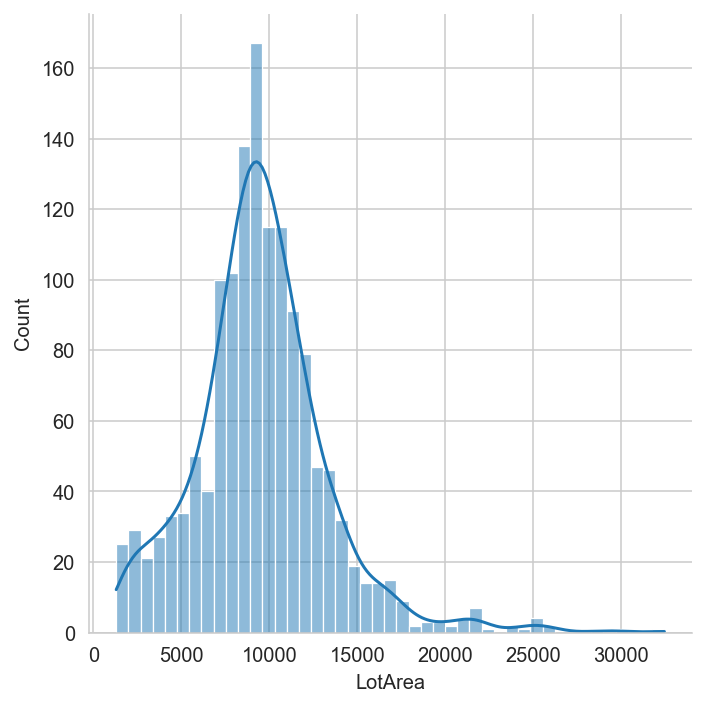

In [35]:
sns.displot(house_clean['LotArea'], kde=True);

766.0999999999999


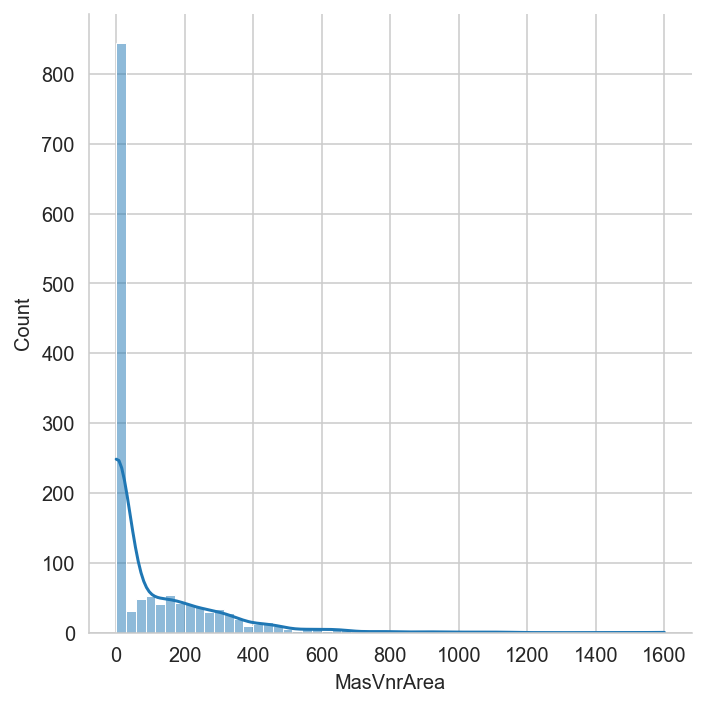

In [36]:
# check the distribution of the Target variable, i.e. Sales Price
print(house_clean['MasVnrArea'].quantile(0.99))  # Check and print the 99th%-ile value
sns.displot(house_clean['MasVnrArea'], kde=True);

In [37]:
q_mas = house_clean['MasVnrArea'].quantile(0.99)
house_clean = house_clean[house_clean['MasVnrArea'] < q_mas]     # slice out all rows below the %ile val and re-assign
house_clean.reset_index(drop=True, inplace=True)            # reset indices
house_clean.shape

(1382, 76)

## *Dataset is now cleaned and ready for modelling*

-------------------------------------------------------------
## Part 1.2: Separation of the dataset

Need to separate out the FIXED vs RENOVATABLE Features, and Train/Test data

### Discussion notes:

1. The following features are considered **Fixed**;
    - MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, YearBuilt, YearRemodAdd, RoofStyle, MasVnrArea, Foundation, BsmtQual, BsmtExposure, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, ,HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageType, GarageYrBlt, GarageCars, GarageArea, PavedDrive, PoolArea, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition.
    
   
2. The following features are considered **Renovatable**:
 - OverallQual, OverallCond, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, BsmtCond, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, Heating, HeatingQC, CentralAir, Electrical, LowQualFinSF, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolQC, Fence


In [38]:
# list out all identified Fixed Features
# include the SalesPrice target variable as the 1st column to ease grabbing the Target var later

fixed_predictors = ['SalePrice','MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig', 'Neighborhood', 
                    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'Foundation',
                    '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 
                    'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea', 'PavedDrive', 'PoolArea', 'MiscFeature', 'MiscVal', 
                    'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'RoofStyle', 'Alley', 'LandContour', 'LandSlope',
                    'MasVnrArea', 'BsmtQual', 'BsmtExposure', 'Fireplaces','GarageType', 'GarageYrBlt']

len(fixed_predictors)

43

In [39]:
# create dataset of the desired Fixed predictors
house_fixed = house_clean.copy()                   #copy cleaned DF
house_fixed = house_fixed[fixed_predictors]        #slice out desired Features 
print(house_fixed.shape)                           # check shape
house_fixed.head()

(1382, 43)


,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,Foundation,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageArea,PavedDrive,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,RoofStyle,Alley,LandContour,LandSlope,MasVnrArea,BsmtQual,BsmtExposure,Fireplaces,GarageType,GarageYrBlt
0,208500,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,PConc,856,854,1710,1,0,2,1,3,1,548,Y,0,NA,0,2,2008,WD,Normal,Gable,NA,Lvl,Gtl,196.0,Gd,No,0,Attchd,2003.0
1,181500,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,CBlock,1262,0,1262,0,1,2,0,3,1,460,Y,0,NA,0,5,2007,WD,Normal,Gable,NA,Lvl,Gtl,0.0,Gd,Gd,1,Attchd,1976.0
2,223500,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,Norm,1Fam,2Story,2001,2002,PConc,920,866,1786,1,0,2,1,3,1,608,Y,0,NA,0,9,2008,WD,Normal,Gable,NA,Lvl,Gtl,162.0,Gd,Mn,1,Attchd,2001.0
3,140000,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,Norm,1Fam,2Story,1915,1970,BrkTil,961,756,1717,1,0,1,0,3,1,642,Y,0,NA,0,2,2006,WD,Abnorml,Gable,NA,Lvl,Gtl,0.0,TA,No,1,Detchd,1998.0
4,250000,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,Norm,1Fam,2Story,2000,2000,PConc,1145,1053,2198,1,0,2,1,4,1,836,Y,0,NA,0,12,2008,WD,Normal,Gable,NA,Lvl,Gtl,350.0,Gd,Av,1,Attchd,2000.0


### Discussion notes:

The following categorical Features need to be dummied:
- To be dummied: 'MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',       'HouseStyle', 'Foundation',  'PavedDrive', 'MiscFeature','MiscVal',  'SaleType', 'SaleCondition', 'MoSold'

In [40]:
# create dummy variables for the categorical data

# list out Features that need to be dummied
to_dummy = ['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
            'HouseStyle', 'Foundation', 'PavedDrive', 'MiscFeature','MiscVal', 'SaleType', 'SaleCondition', 'MoSold',
            'Alley', 'LandContour', 'LandSlope', 'BsmtQual', 'BsmtExposure', 'GarageType', 'RoofStyle']

# use built-in methods to dummy cat Features - rely on built-in 'drop_first' to drop one dummy
house_fixed_d = pd.get_dummies(data=house_fixed, columns=to_dummy, prefix_sep='_', drop_first=True)
print(house_fixed_d.shape)
house_fixed_d.head()

(1382, 172)


,SalePrice,LotFrontage,LotArea,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageArea,PoolArea,YrSold,MasVnrArea,Fireplaces,GarageYrBlt,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,PavedDrive_P,PavedDrive_Y,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscVal_350,MiscVal_400,MiscVal_450,MiscVal_480,MiscVal_500,MiscVal_600,MiscVal_620,MiscVal_700,MiscVal_800,MiscVal_1150,MiscVal_1200,MiscVal_1300,MiscVal_1400,MiscVal_2000,MiscVal_2500,MiscVal_3500,MiscVal_8300,MiscVal_15500,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,Alley_NA,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,208500,65.0,8450,2003,2003,856,854,1710,1,0,2,1,3,1,548,0,2008,196.0,0,2003.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
1,181500,80.0,9600,1976,1976,1262,0,1262,0,1,2,0,3,1,460,0,2007,0.0,1,1976.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,223500,68.0,11250,2001,2002,920,866,1786,1,0,2,1,3,1,608,0,2008,162.0,1,2001.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
3,140000,60.0,9550,1915,1970,961,756,1717,1,0,1,0,3,1,642,0,2006,0.0,1,1998.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Discussion notes:

Splitsville time. Separate out the pre-2010 and 2010 data for Train / Test datasets.

In [41]:
# create fresh copies
house_fix_train = house_fixed_d.copy()
house_fix_test = house_fixed_d.copy() 

# split into pre-2010 and 2010 datasets based on Yr Sold
house_fix_train = house_fix_train.drop(house_fix_train[(house_fix_train['YrSold'] == 2010)].index) 
house_fix_test = house_fix_test.drop(house_fix_test[(house_fix_test['YrSold'] < 2010)].index) 

# check n# rows in resultant datasets
print(house_fix_train.shape)
print(house_fix_test.shape)

(1218, 172)
(164, 172)


In [42]:
# create train/test Feature vars and target vars
X_train = house_fix_train.iloc[:,1:]
y_train = house_fix_train['SalePrice']

X_test = house_fix_test.iloc[:,1:]
y_test = house_fix_test['SalePrice']

### Discussion notes:

 - Feature variables are all on different scales. Will standardise the data prior to modelling.

In [43]:
from sklearn.preprocessing import StandardScaler

# initialize the Scaler
ss = StandardScaler()

# Fit the data using the scaler (scale the data)
X_stan = ss.fit_transform(X_train)

# transform the test Feature variable set
X_test_stan = ss.transform(X_test)


---------------------------------------------------
## Part 1.3: Modelling

 - With a large number of Features and potentially noisy data, I wanted to focus on ooptimisation techniques.
 - Decided to action this by employing a Stochastic Gradient Descent regressor and wrapping it up in a GridSearchCV to fine tune the hyperparameters.
 - Didn't want to waste time throwing all the spaghetti at the wall, so focused the Grid on the following;
     - Loss functions for both the 'Squared'/OLS and the Huber loss, given that the Huber is less sensitive to outliers and therefore may provide some additional signal capture.
     - both Lasso and Ridge penalities considered for optimisation via regularisation.
     - alpha values ranging from 0.1 - 10.
     - cross validation with 10 folds for good measure against potential overfitting.


In [44]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, explained_variance_score

In [45]:
# set up my gridsearch parameters:
sgd_params = {
    'loss':['squared_loss','huber'],
    'penalty':['l1','l2'],
    'alpha':np.logspace(-1,1,100)
}

sgd_reg = SGDRegressor(max_iter=100000, tol=0.01, average=True)
sgd_reg_gs = GridSearchCV(sgd_reg, sgd_params, cv=10, verbose=False)

In [46]:
sgd_reg_gs.fit(X_stan, y_train)
print(sgd_reg_gs.best_params_)
print("R² (train):",round(sgd_reg_gs.best_score_, 3))

{'alpha': 0.9770099572992254, 'loss': 'squared_loss', 'penalty': 'l2'}
R² (train): 0.826


### WARNING: Note for BF
 - I noticed when re-running my notebook on Friday morning, that the GridSearch would hone in on slightly different alphas as the best estimator and annoyingly the model performance seems very sensitive to the alpha (panic attacks ensued....).
 - By performance, I noticed it more in the residual plots and order of the highest beta coefs, rather than just the R².
 - In particular, a very weird outlier popped up on Friday morning that wasn't there before... after re-running the GridSearch, I got the outcomes I was expecting as it had honed in on a different alpha.
 - I think this talks to there still being outliers, collinearity and/or heteroscedasticity in the Feature set.
 
 
 - To ensure you get the same output I presented, I've hardcoded the "final" model below with the best estimator parameters that came out originally, but have left my original cells above so you can follow the working. 

In [47]:
#sgd_reg = sgd_reg_gs.best_estimator_

# best estimator from GridSearch: {'alpha': 1.0235310218990263, 'loss': 'squared_loss', 'penalty': 'l2'}
sgd_reg = SGDRegressor(max_iter=100000, tol=0.01, average=True, 
                       loss='squared_loss', penalty='l2', alpha= 1.0235310218990263)
sgd_reg.fit(X_stan, y_train)

SGDRegressor(alpha=1.0235310218990263, average=True, max_iter=100000, tol=0.01)

In [48]:
# score against the Test data
round(sgd_reg.score(X_test_stan, y_test),3)

0.821

### Discussion notes:
- Test R² value is reasonably high and inline with the training score, this suggests that the model is fitted well, i.e. neithing overfitting nor underfitting.
- Model is explaining approx. 82% of the total variance in the test dataset.


In [49]:
# Create a dataframe of the model coefficients for reference
model_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':sgd_reg.coef_,
                            'abs_coef':np.abs(sgd_reg.coef_)})

model_coefs.sort_values('abs_coef', inplace=True, ascending=False)

model_coefs.head(10)

,variable,coef,abs_coef
6,GrLivArea,8353.523372,8353.523372
4,1stFlrSF,7737.767409,7737.767409
13,GarageArea,5885.244230,5885.244230
58,Neighborhood_NridgHt,4999.896221,4999.896221
3,YearRemodAdd,4950.675106,4950.675106
17,Fireplaces,4542.970985,4542.970985
9,FullBath,4155.702130,4155.702130
16,MasVnrArea,3901.783113,3901.783113
7,BsmtFullBath,3705.604091,3705.604091
2,YearBuilt,3501.065433,3501.065433


In [50]:
# Check percentage of zeroed out Features
print('Percent variables zeroed out:', round(np.sum((sgd_reg.coef_ == 0))/float(X_train.shape[1])*100,2),"%")

Percent variables zeroed out: 1.17 %


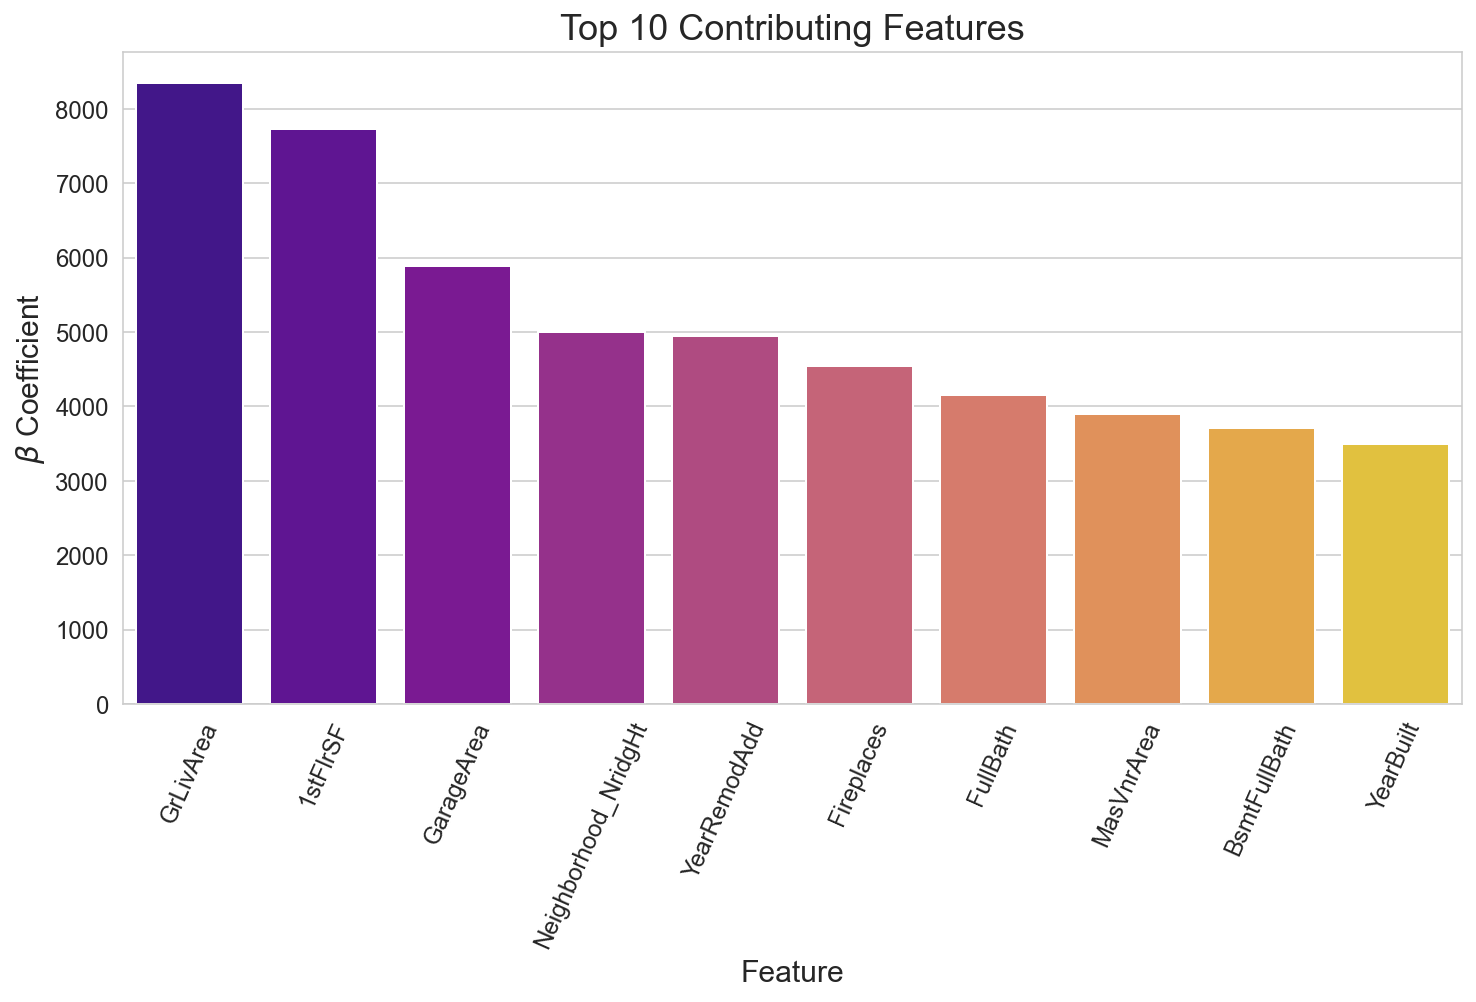

In [51]:
# create a figure of the top 10 features
fig = plt.figure(figsize=(12,6))

fig = sns.barplot(x='variable', y='coef', data=model_coefs.iloc[:10,:], palette='plasma')

for item in fig.get_xticklabels():
    item.set_rotation(66)
fig.tick_params(labelsize=12)
plt.title('Top 10 Contributing Features', fontsize=18)
plt.xlabel("Feature", fontsize=15)
plt.ylabel(r'$\beta$ Coefficient', fontsize=15)
plt.savefig('fix_top_ten.png', bbox_inches='tight', pad_inches=0.2);

### Discussion notes:
 - Most important Features identified by the model are sensible/understandable and relate to the overall house size; namely Ground Living Area, First Floor Area and Garage Area.
 - The neighbourhood Feature is a dummied variable indicating that a property in the Northridge Heights area is of higher value to the base comparison (dropped dummy) of Bloomington Heights.
 - Year Remodelled also makes logical sense, indicated an increase (~$5k) for each year closer to the sale date, i.e. the more recent the remodelling, the higher the value.
 - Fireplaces also seem important to Iowans, which makes sense given the location in the US.

In [52]:
# make predictions on the train set
train_preds = sgd_reg.predict(X_stan)
# predictions on test data
y_hat = sgd_reg.predict(X_test_stan)

## Calculation of the residuals
resid_train = y_train - train_preds
resid_test = y_test - y_hat

# Create DFs of the residuals with actuals and preds for ease of reference
df_resid_train = pd.DataFrame(data={'Actual': y_train, 'Prediction': train_preds, 'Resid': resid_train})
df_resid_test = pd.DataFrame(data={'Actual': y_test, 'Prediction': y_hat, 'Resid': resid_test})


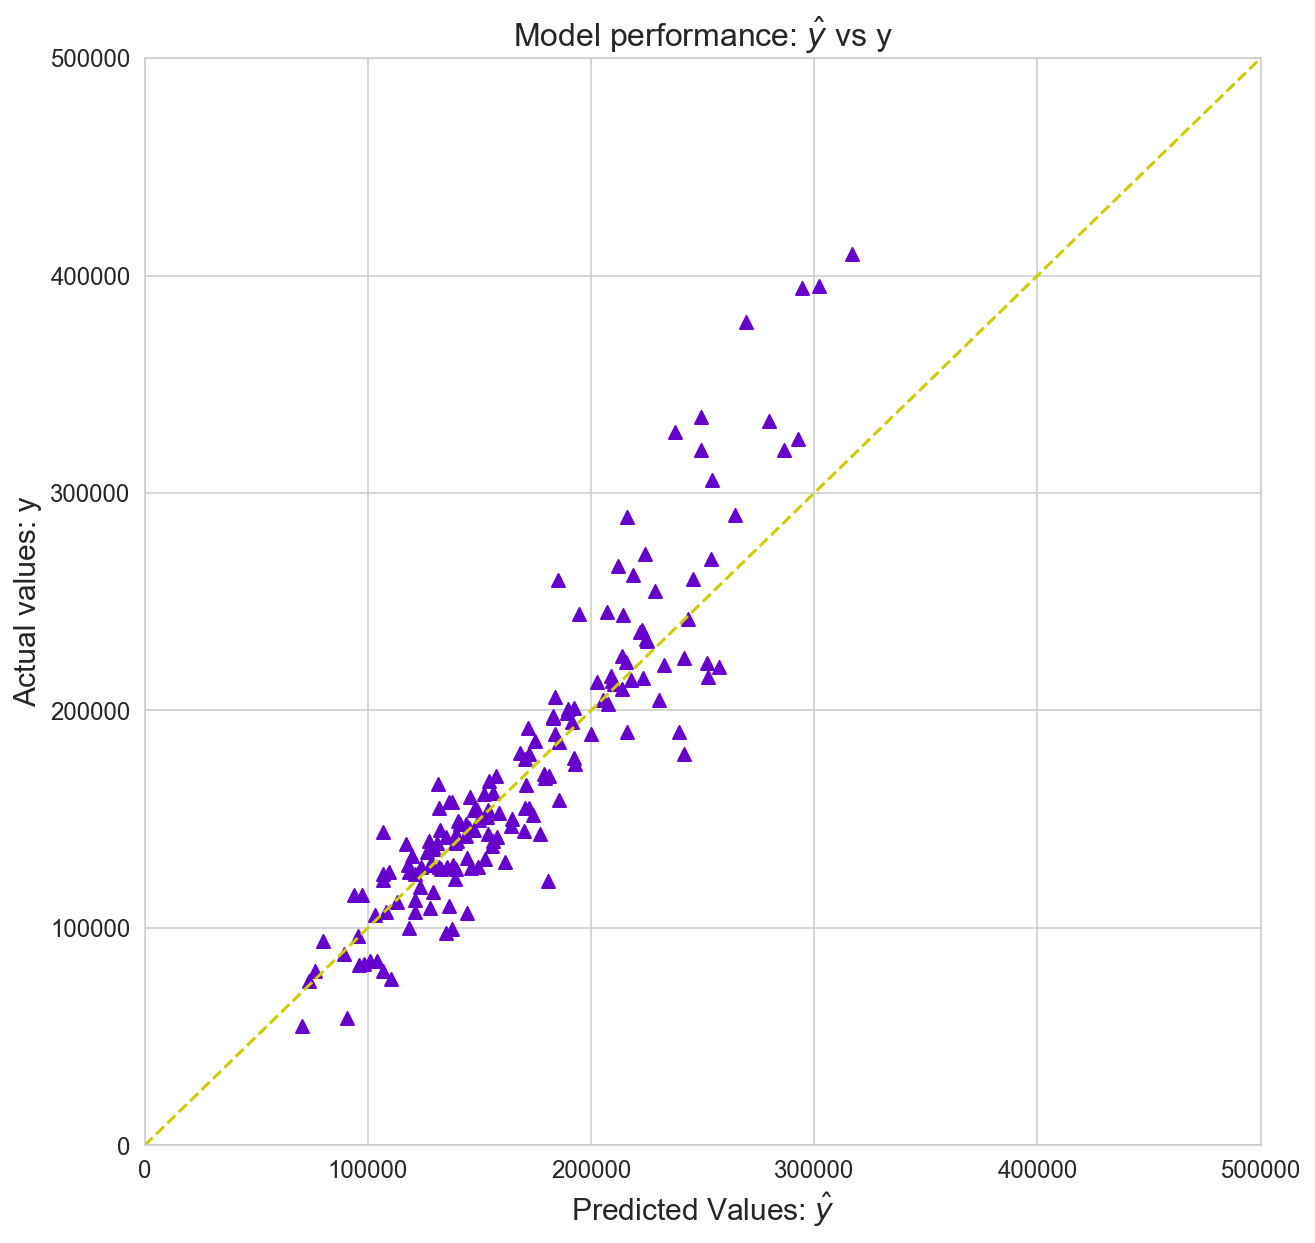

In [53]:
# create a figure of the predicted vs actuals for the test data
fig = plt.figure(figsize=(10,10))
ax = plt.gca()            # get the axis of that figure

# scatter plot of model performance
ax.scatter(y_hat, y_test, c='#6600cc', marker='^', s=42)

# set the axis limits so that the scale is the same, i.e. easier to visually assess against the ideal
ax.set_xlim(0,500000)
ax.set_ylim(0,500000)

# add a line showing perfect relationship for visual aid
ax.plot([0,6*10**5],[0,6*10**5], color='#cccc00', linestyle='dashed')

# add titles and labels
ax.set_title('Model performance: $\hat{y}$ vs y', fontsize=16)
plt.xlabel("Predicted Values: $\hat{y}$", fontsize=15)
plt.ylabel('Actual values: y', fontsize=15)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.savefig('fix_perf.png', bbox_inches='tight', pad_inches=0.2);

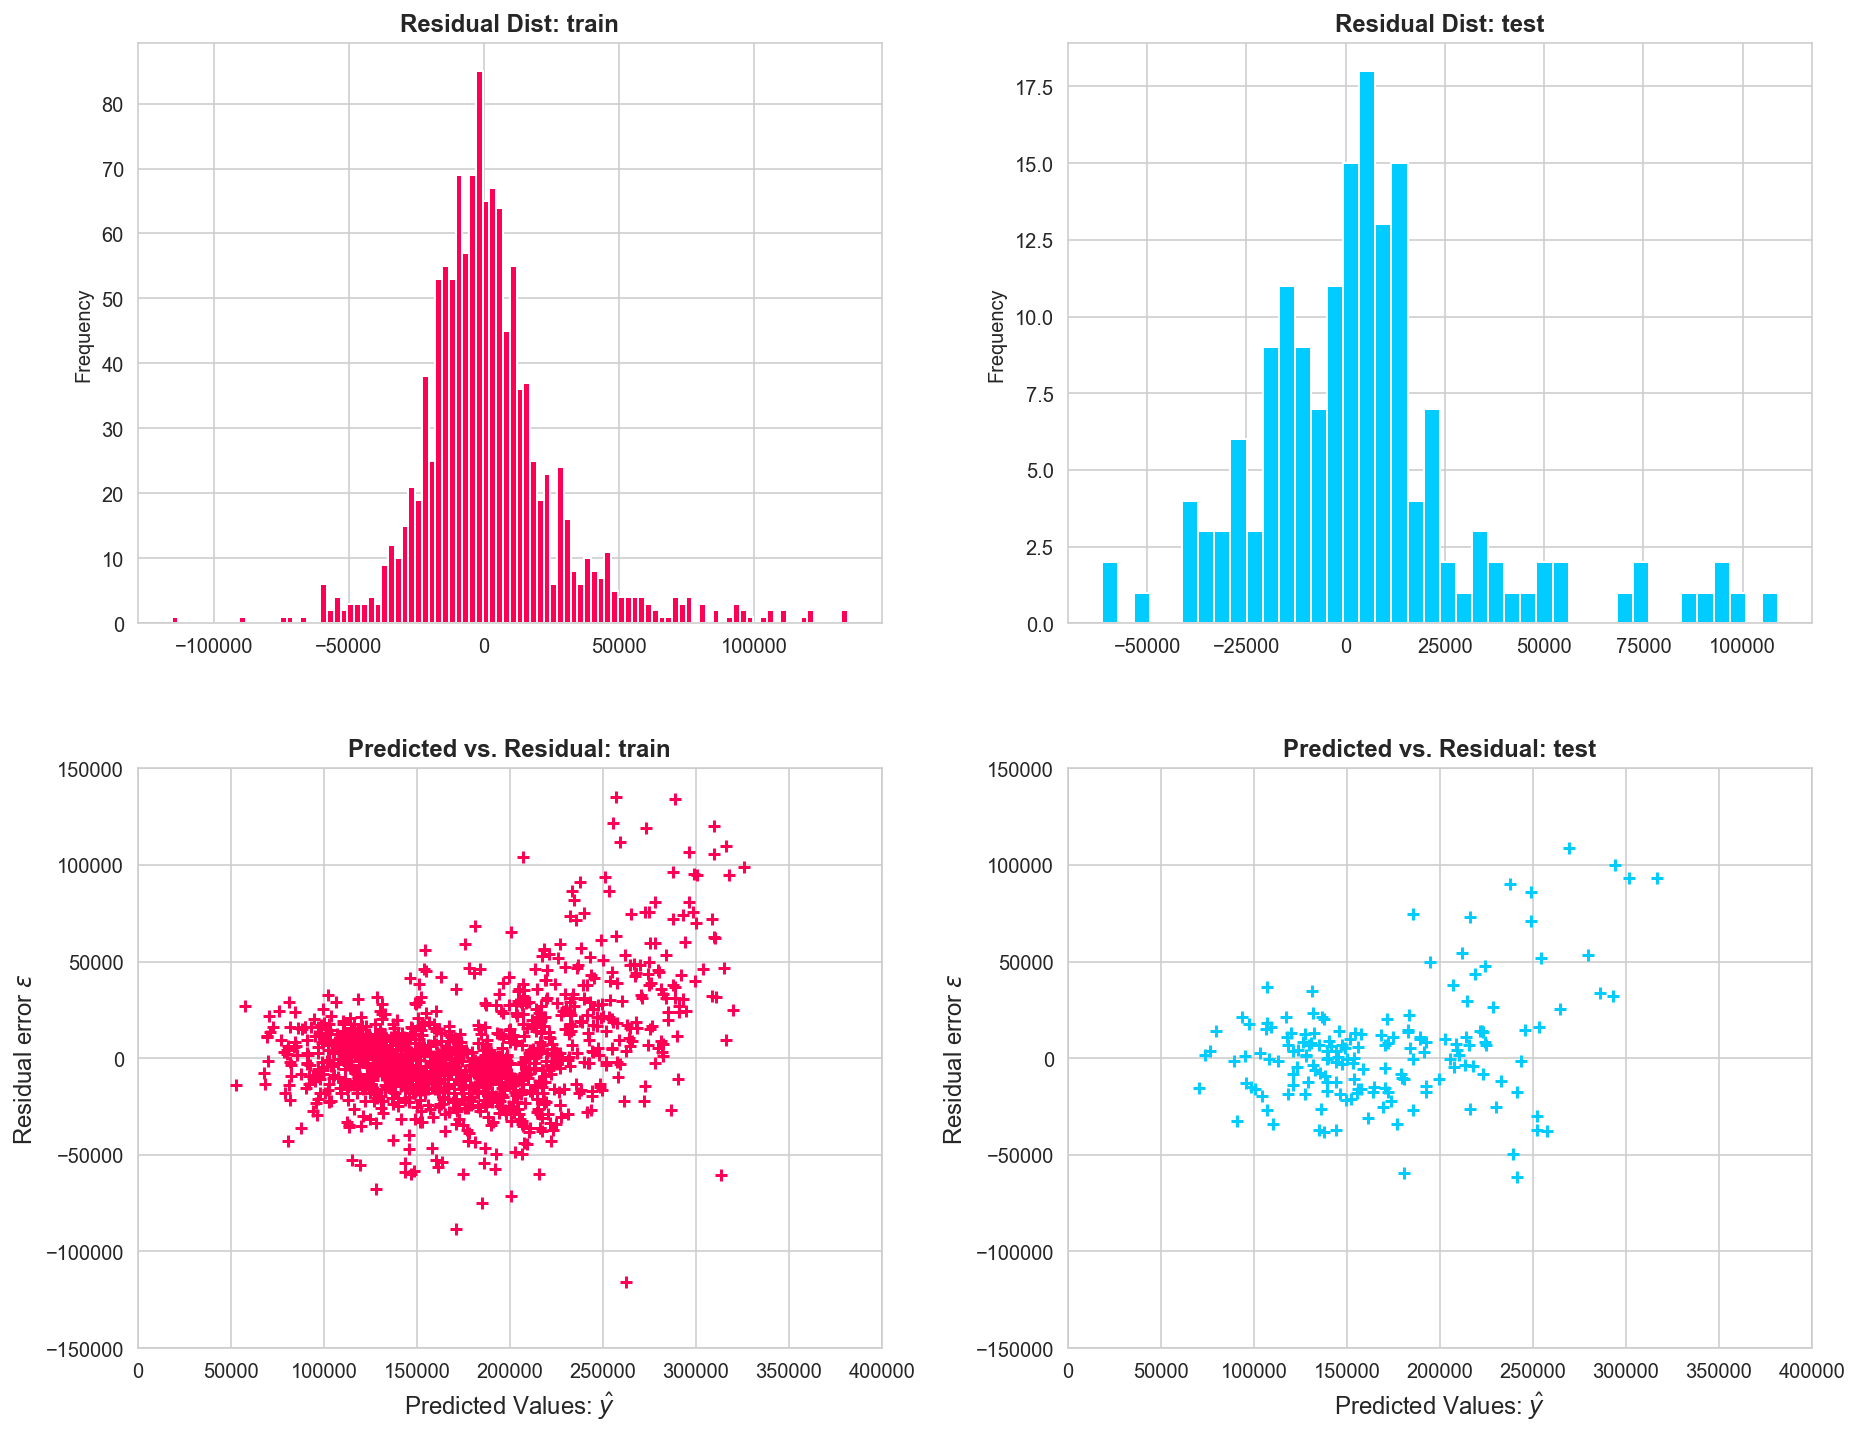

Model Test performance statistics:
----------------------------------
Mean residual error ε:    4615.2 ( 2.64 % of the average house price )
St Dev residual error ε:  28604.9
RMSE:                     28974.84
Explained VAR:            0.825


<Figure size 432x288 with 0 Axes>

In [98]:
# Create some plots of the residuals 
# assign fig and axis vars for subplot
fig, axs = plt.subplots(2, 2, figsize=(15,12))

# Histogram plots for train/test residuals
df_resid_train['Resid'].plot(kind='hist', bins=100, ax=axs[0,0], color = '#ff0055')
df_resid_test['Resid'].plot(kind='hist', bins=42, ax=axs[0,1], color = '#00ccff')

#scatter plots for train/test residuals
axs[1,0].scatter(x=df_resid_train['Prediction'], y=df_resid_train['Resid'], color = '#ff0055', marker='+')
axs[1,1].scatter(x=df_resid_test['Prediction'], y=df_resid_test['Resid'], color = '#00ccff', marker='+')

# set the axis limits of second residual scatter to allow quick comp against
axs[1,0].set_xlim(0,400000)
axs[1,0].set_ylim(-150000,150000)
axs[1,1].set_xlim(0,400000)
axs[1,1].set_ylim(-150000,150000)

axs[0,0].set_title('Residual Dist: train',fontsize=12, fontweight='bold')
axs[0,1].set_title('Residual Dist: test',fontsize=12, fontweight='bold')
axs[1,0].set_title('Predicted vs. Residual: train',fontsize=12, fontweight='bold')
axs[1,1].set_title('Predicted vs. Residual: test',fontsize=12, fontweight='bold')

axs[1,0].set_xlabel('Predicted Values: $\hat{y}$',fontsize=12)
axs[1,0].set_ylabel('Residual error $\epsilon$',fontsize=12)
axs[1,1].set_xlabel('Predicted Values: $\hat{y}$',fontsize=12)
axs[1,1].set_ylabel('Residual error $\epsilon$',fontsize=12)

plt.subplots_adjust(wspace=0.25, hspace=0.25)     #modify the spacing between the plot

plt.show()

# print out some performance statistics
print("Model Test performance statistics:")
print("----------------------------------")
print("Mean residual error \u03B5:   ", round(np.mean(resid_test),1),
      "(", round(np.mean(resid_test) / np.mean(house_clean['SalePrice'])*100,2),'% of the average house price )')
print("St Dev residual error \u03B5: ", round(np.std(resid_test),1))
print("RMSE:                    ", round(np.sqrt(mean_squared_error(y_test, y_hat)),2))
print("Explained VAR:           ", round(explained_variance_score(y_test, y_hat),3))

plt.savefig('fix_resids.png', bbox_inches='tight', pad_inches=0.2);


**************************************
### Discussion notes:
 - Error distriubtion is fairly normal for the Train data, and approximating towards normal for Test data. The distributions are indicating some positive skew which is not ideal. Indicative of underlying relationships in the Feature data.   
 - Scatter plots do indicate some underlying signal in the residuals, indicating that the underlying Features contain some unfixed noise.
     - two potential sources;
         - remaining (multi)collinearity between feature variables; and
         - a level of heteroscadiscity. This may be a prime source of underlying issues as there does appear to be a bias in the model for higher value properties. >>> This could be resolved by log-transforming the SalesPrice variable to remove any non-linearality.

 - The Train and Test R² values are very similar which suggests little variance in the model performance, and a good fit (no under/over fitting).
 - There does appear to be some bias in the model performance, particularly with higher value properties. This is likely due to an underlying non-linear relationship present in the SalesPrice - transforming this could improve overall performance.
 - The Explained Variance of the test model is similar to the R² value, which indicates that the underlying skew in the residuals is not severe and a relatively low mean error term.
 
 
 
 - **Do I trust this model?**
     - Broadly speaking, yes. 
     - It appears to work fairly well in predicting property vales with a mean residual error on the test data of around 2.5% the mean property value
     - the model variance appears good with minimal difference between Train/Test scores.
     - R² value is decent, indicating  that the model is explaining ~82% of the variance.



 - **Can the model be improved?**
      - Definitely!
      - There is likely a non-linear relationship present between all/some of the Features with the SalePrice. Transformations could resolve this issue.
      - additional multicollineararity likely still persists in the Feature set. A more strigent cut off on the correlations could be considered, or additional checks such as VIF could be employed to further improve the Feature data.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Q2. Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 of the project: what are the costs/benefits of renovateable features such as quality, condition, and renovations?

To isolate the effect of the renovateable features on the sale price one way of doing this is to use the residuals from the first model as your target variable in the second model. The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. You will use the renovateable features as the predictors for this second model.  

 
---

### **Your goals for question two:**

Use the features in the data that are renovatable as predictors for your second model. This second model will predict the variance/residuals from the first model.  As with Q1 , train the model on pre-2010 data and evaluate its performance on the 2010 houses.

How well has your chosen model done?  


Which renovateable features are the most important in your second model .  Articulate your findings and make sense of the results.

 
Do you trust your model?   

 

---------------------------------------------------
## Part 2.1: Feature vars

Create and modify as needed the Renovatable Feature variable set

In [55]:
# Year sold included for ease in the split between train/test
reno_predictors = ['YrSold','OverallQual', 'OverallCond', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
                   'ExterCond', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 
                   'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenQual', 'Functional', 
                   'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                   '3SsnPorch', 'ScreenPorch', 'PoolQC', 'Fence']

In [56]:
# create dataset of the desired Renovatable predictors
house_reno = house_clean.copy()                   #copy cleaned DF
house_reno = house_reno[reno_predictors]        #slice out desired Features 
print(house_reno.shape)                           # check shape
house_reno.head()

(1382, 33)


,YrSold,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,Fence
0,2008,7,5,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,TA,GLQ,706,Unf,0,150,GasA,Ex,Y,SBrkr,0,Gd,Typ,NA,RFn,TA,TA,0,61,0,0,0,NA,NA
1,2007,6,8,CompShg,MetalSd,MetalSd,None,TA,TA,TA,ALQ,978,Unf,0,284,GasA,Ex,Y,SBrkr,0,TA,Typ,TA,RFn,TA,TA,298,0,0,0,0,NA,NA
2,2008,7,5,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,TA,GLQ,486,Unf,0,434,GasA,Ex,Y,SBrkr,0,Gd,Typ,TA,RFn,TA,TA,0,42,0,0,0,NA,NA
3,2006,7,5,CompShg,Wd Sdng,Wd Shng,None,TA,TA,Gd,ALQ,216,Unf,0,540,GasA,Gd,Y,SBrkr,0,Gd,Typ,Gd,Unf,TA,TA,0,35,272,0,0,NA,NA
4,2008,8,5,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,TA,GLQ,655,Unf,0,490,GasA,Ex,Y,SBrkr,0,Gd,Typ,TA,RFn,TA,TA,192,84,0,0,0,NA,NA


In [57]:
# list out the variables to dummy for this feature set
to_dummy_reno = ['RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'BsmtCond', 
                'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 
                'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']

# use Pandas functionality to dummy categorical data - drop first used for ease
house_reno_d = pd.get_dummies(data=house_reno, columns=to_dummy_reno, prefix_sep='_', drop_first=True)
house_reno_d.head()

,YrSold,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,CentralAir,LowQualFinSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PoolQC_Gd,PoolQC_NA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA
0,2008,7,5,706,0,150,Y,0,0,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
1,2007,6,8,978,0,284,Y,0,298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
2,2008,7,5,486,0,434,Y,0,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
3,2006,7,5,216,0,540,Y,0,0,35,272,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
4,2008,8,5,655,0,490,Y,0,192,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1


In [58]:
# Feature engineer Central air and convert to binary; 1 = YES, 0 = NO

house_reno_d['CentralAir'] = house_reno_d['CentralAir'].apply(lambda i: 1 if i =='Y' else 0)
house_reno_d.head()

,YrSold,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,CentralAir,LowQualFinSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PoolQC_Gd,PoolQC_NA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA
0,2008,7,5,706,0,150,1,0,0,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
1,2007,6,8,978,0,284,1,0,298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
2,2008,7,5,486,0,434,1,0,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
3,2006,7,5,216,0,540,1,0,0,35,272,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
4,2008,8,5,655,0,490,1,0,192,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1


In [59]:
# split into pre-2010 and 2010 datasets based on Yr Sold
house_reno_train = house_reno_d[(house_reno_d['YrSold'] != 2010)] 
house_reno_test = house_reno_d[(house_reno_d['YrSold'] == 2010)] 

In [60]:
# create train/test Feature vars and target vars, skipping the YrSold column 
X_r_train = house_reno_train.iloc[:,1:]
y_r_train = resid_train

X_r_test = house_reno_test.iloc[:,1:]
y_r_test = resid_test

In [61]:
# initialize the Scaler
ss_r = StandardScaler()

# Fit the data using the scaler (scale the data)
X_r_st = ss_r.fit_transform(X_r_train)

# transform the test Feature variable set
X_r_test_st = ss_r.transform(X_r_test)


---------------------------------------------------
## Part 2.2: Modelling

 - Now focusing on the residuals, the data is assumed to be noisy, I wanted to focus on ooptimisation techniques.
 - Similar to Q1, I employed a Stochastic Gradient Descent regressor and wrapped it up in a GridSearchCV to fine tune the hyperparameters.
 - Didn't want to waste time throwing all the spaghetti at the wall, so focused the Grid on the following;
     - Loss functions for both the 'Squared'/OLS and the Huber loss, given that the Huber is less sensitive to outliers and therefore may provide some additional signal capture.
     - both Lasso and Ridge penalities considered for optimisation via regularisation.
     - alpha values ranging from 15 - 70. Found that strongr regularisation was needed to fine tune the model in this question.
     - cross validation with 5 folds for good measure against potential overfitting. Found through model testing that a fewer amount of folds gave better less variable performance.


In [62]:
# set up my gridsearch parameters:
sgd_params_res = {
    'loss':['squared_loss','huber'],
    'penalty':['l1','l2'],
    'alpha':np.logspace(1.2,1.8,200)
}

sgd_res_reg = SGDRegressor(max_iter=100000, tol=0.001, average=True)
sgd_res_reg_gs = GridSearchCV(sgd_res_reg, sgd_params_res, cv=5, verbose=False)

In [63]:
sgd_res_reg_gs.fit(X_r_st, y_r_train)
print(sgd_res_reg_gs.best_params_)
print("Model TRAIN performance: R² =",round(sgd_res_reg_gs.best_score_, 3))

{'alpha': 33.54502660861874, 'loss': 'squared_loss', 'penalty': 'l1'}
Model TRAIN performance: R² = 0.363


### WARNING: Note for BF
 - Similar "issues" to Q1 arise with the GridSearch honing in on slightly different alphas.
 
 - To ensure you get the same output I presented, I've hardcoded the "final" model below with the best estimator parameters that came out originally, but have left my original cells above so you can follow the working.

In [104]:
#sgd_res_reg = sgd_res_reg_gs.best_estimator_

# best estimator from GridSearch: {'alpha': 27.238041635421737, 'loss': 'squared_loss', 'penalty': 'l1'}
sgd_res_reg = SGDRegressor(max_iter=100000, tol=0.001, average=True, 
                       loss='squared_loss', penalty='l1', alpha= 27.238041635421737)
sgd_res_reg.fit(X_r_st, y_r_train)


SGDRegressor(alpha=27.238041635421737, average=True, max_iter=100000,
             penalty='l1')

In [105]:
# score against the Test data 
print("Model TEST performance: R² =",round(sgd_res_reg.score(X_r_test_st, y_r_test),3))

Model TEST performance: R² = 0.367


In [106]:
#Coefs baby!!
model_r_coefs = pd.DataFrame({'variable':X_r_train.columns,
                            'coef':sgd_res_reg.coef_,
                            'abs_coef':np.abs(sgd_res_reg.coef_)})

model_r_coefs.sort_values('abs_coef', inplace=True, ascending=False)

model_r_coefs.head(10)

,variable,coef,abs_coef
0,OverallQual,9340.466494,9340.466494
2,BsmtFinSF1,6724.573833,6724.573833
1,OverallCond,5555.135933,5555.135933
86,KitchenQual_Gd,-5335.079223,5335.079223
87,KitchenQual_TA,-3684.549209,3684.549209
51,ExterQual_TA,-3647.351217,3647.351217
19,Exterior1st_BrkFace,2341.351948,2341.351948
4,BsmtUnfSF,2220.359435,2220.359435
50,ExterQual_Gd,-1995.074484,1995.074484
29,Exterior1st_Wd Sdng,-1862.037098,1862.037098


In [107]:
# Check percentage of zeroed out Features
print('Percent variables zeroed out:', round(np.sum((sgd_res_reg.coef_ == 0))/float(X_train.shape[1])*100,2),"%")

Percent variables zeroed out: 1.17 %


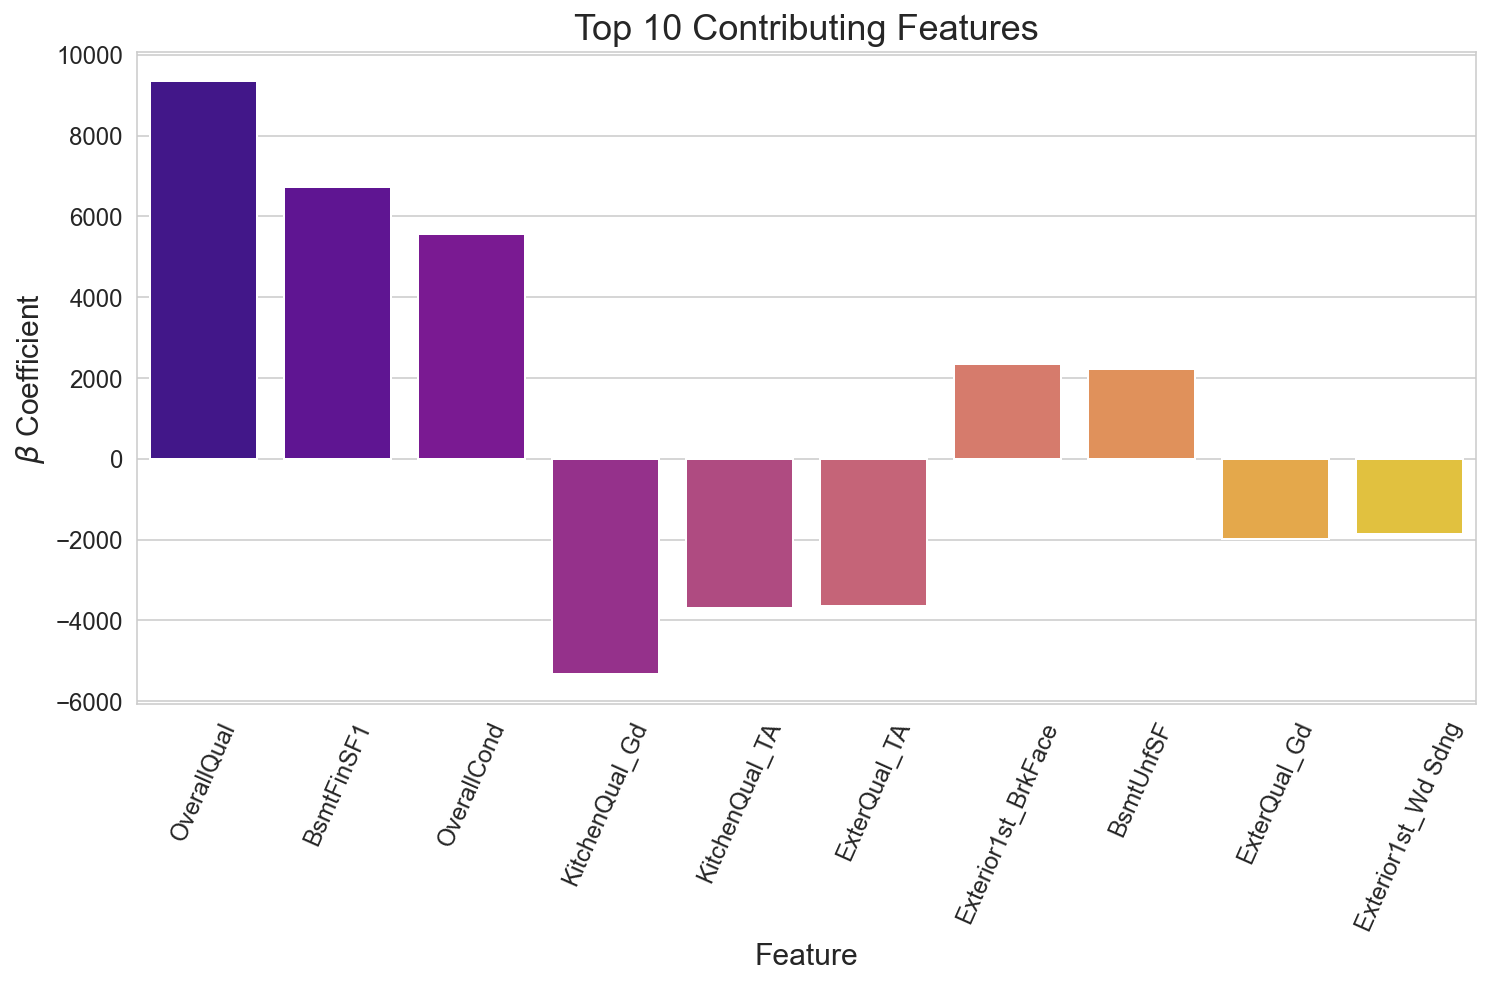

In [108]:
# create a figure of the top 10 features
fig = plt.figure(figsize=(12,6))

fig = sns.barplot(x='variable', y='coef', data=model_r_coefs.iloc[:10,:], palette='plasma')

for item in fig.get_xticklabels():
    item.set_rotation(66)
fig.tick_params(labelsize=12)
plt.title('Top 10 Contributing Features', fontsize=18)
plt.xlabel("Feature", fontsize=15)
plt.ylabel(r'$\beta$ Coefficient', fontsize=15)

plt.savefig('reno_top_ten.png', bbox_inches='tight', pad_inches=0.2);

### Discussion notes:
 - Most important Features identified by the model are sensible and relate to general condition of the property, i.e. `OverallQual` and `OverallCond` both relate to the standard of the finish and condition of the property. It makes complete sense that these Features would be highly regarded for adding value to the Property.
 - in addition, `BsmtFinSF1` relates to the proportion of the finish of the basement.
 - `KitchenQual_Gd` and `KitchenQual_TA` are dummied variables, with the dropped variable representing "Excellent" quality condition. The negative values indicated therefore represent predicted reductions in value compared to the ideal/excellent condition. Explanatory wise, this indicates that value can be added by improving the Kitchen quality towards excellent.

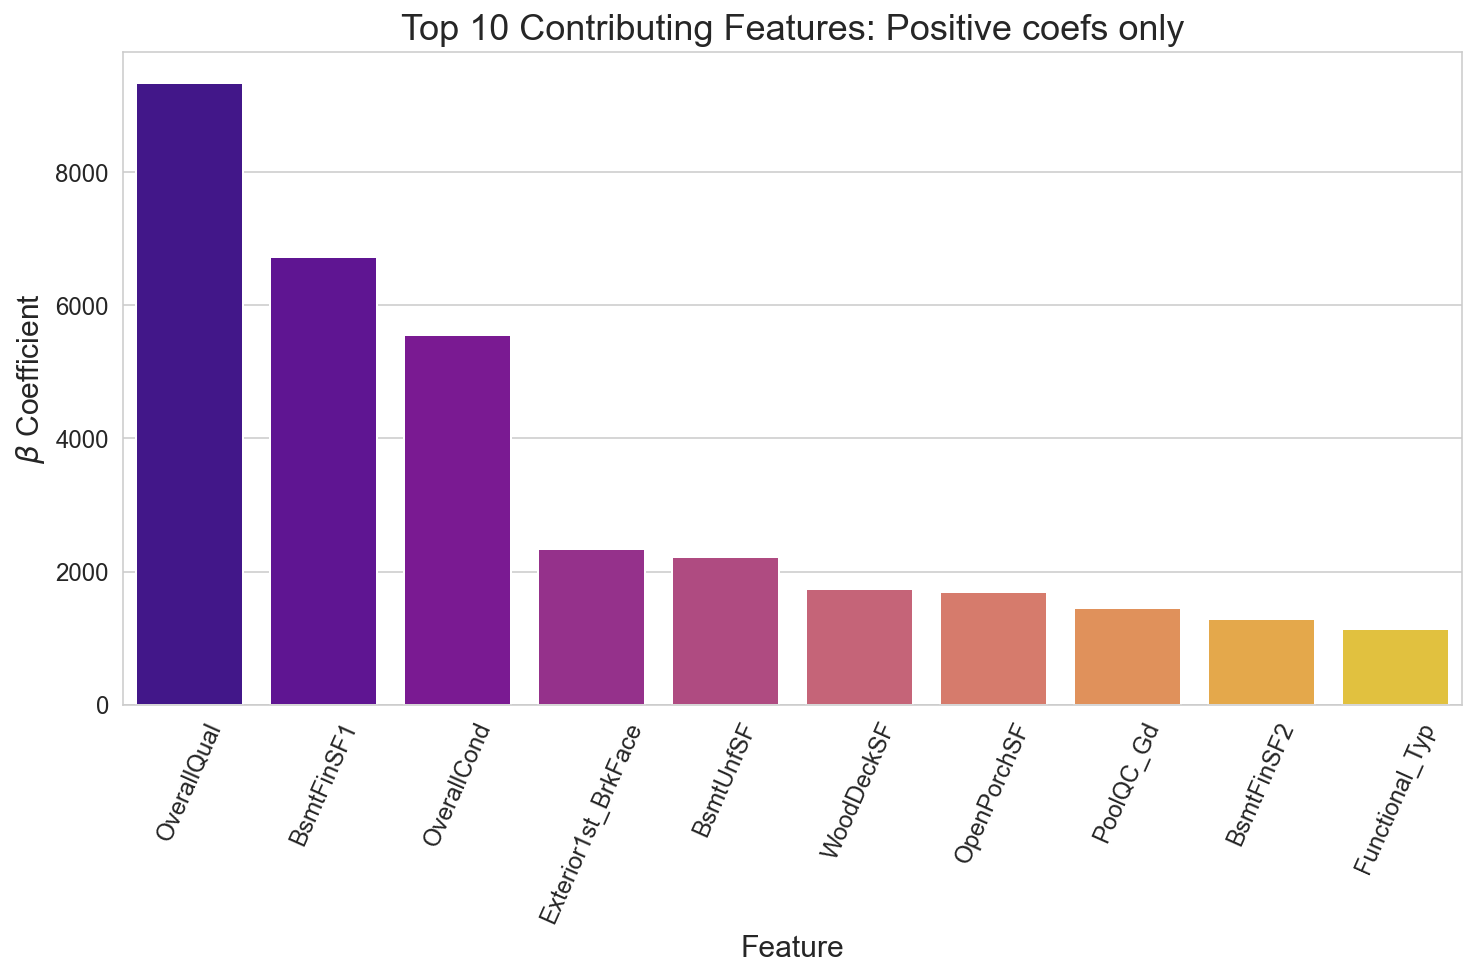

In [109]:
# create a figure of the top 10 POSITIVE features

data = model_r_coefs.sort_values('coef', ascending=False)

fig = plt.figure(figsize=(12,6))

fig = sns.barplot(x='variable', y='coef', data=data.iloc[:10,:], palette='plasma')

for item in fig.get_xticklabels():
    item.set_rotation(66)
fig.tick_params(labelsize=12)
plt.title('Top 10 Contributing Features: Positive coefs only', fontsize=18)
plt.xlabel("Feature", fontsize=15)
plt.ylabel(r'$\beta$ Coefficient', fontsize=15)

plt.savefig('reno_top_ten_pos.png', bbox_inches='tight', pad_inches=0.2);

### Discussion notes:
 - Positive coefs only plotted for interest

In [110]:
# make predictions on the Train set
train_preds_res = sgd_res_reg.predict(X_r_st)
# predictions on test data
y_hat_res = sgd_res_reg.predict(X_r_test_st)

## Calculation of the residuals
resid_train_res = y_r_train - train_preds_res
resid_test_res = y_r_test - y_hat_res

# create DFs of the residuals matched with the predictions and actuals for ease of reference
df_resid_train_res = pd.DataFrame(data={'Actual': y_r_train, 'Prediction': train_preds_res, 'Resid': resid_train_res})
df_resid_test_res = pd.DataFrame(data={'Actual': y_r_test, 'Prediction': y_hat_res, 'Resid': resid_test_res})


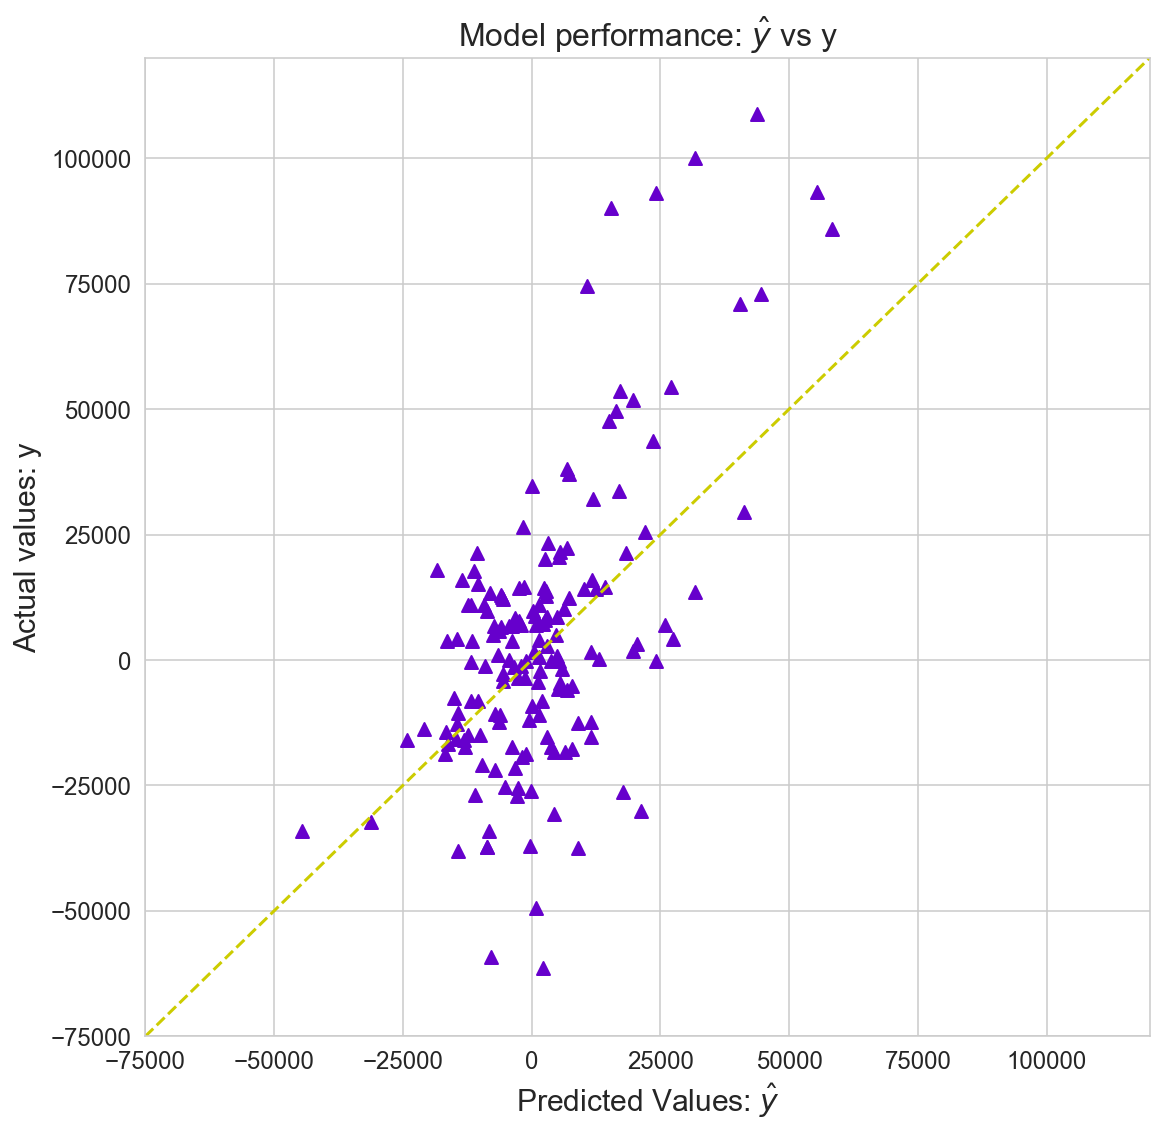

In [111]:
# create a figure of the actuals vs predictions for the test data set
fig = plt.figure(figsize=(9,9))
ax = plt.gca()            # get the axis of that figure

# plot a scatter plot on it with our data
ax.scatter(y_hat_res, y_r_test, c='#6600cc', marker='^', s=42)

# set the axis limits
ax.set_xlim(-75000,120000)
ax.set_ylim(-75000,120000)

# add a line showing perfect relationship for ease of visualisation
ax.plot([-75000,2.5*10**5],[-75000,2.5*10**5], color='#cccc00', linestyle='dashed')

# set the lables, titles
ax.set_title('Model performance: $\hat{y}$ vs y', fontsize=16)
plt.xlabel("Predicted Values: $\hat{y}$", fontsize=15)
plt.ylabel('Actual values: y', fontsize=15)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)


plt.savefig('reno_perf.png', bbox_inches='tight', pad_inches=0.2);

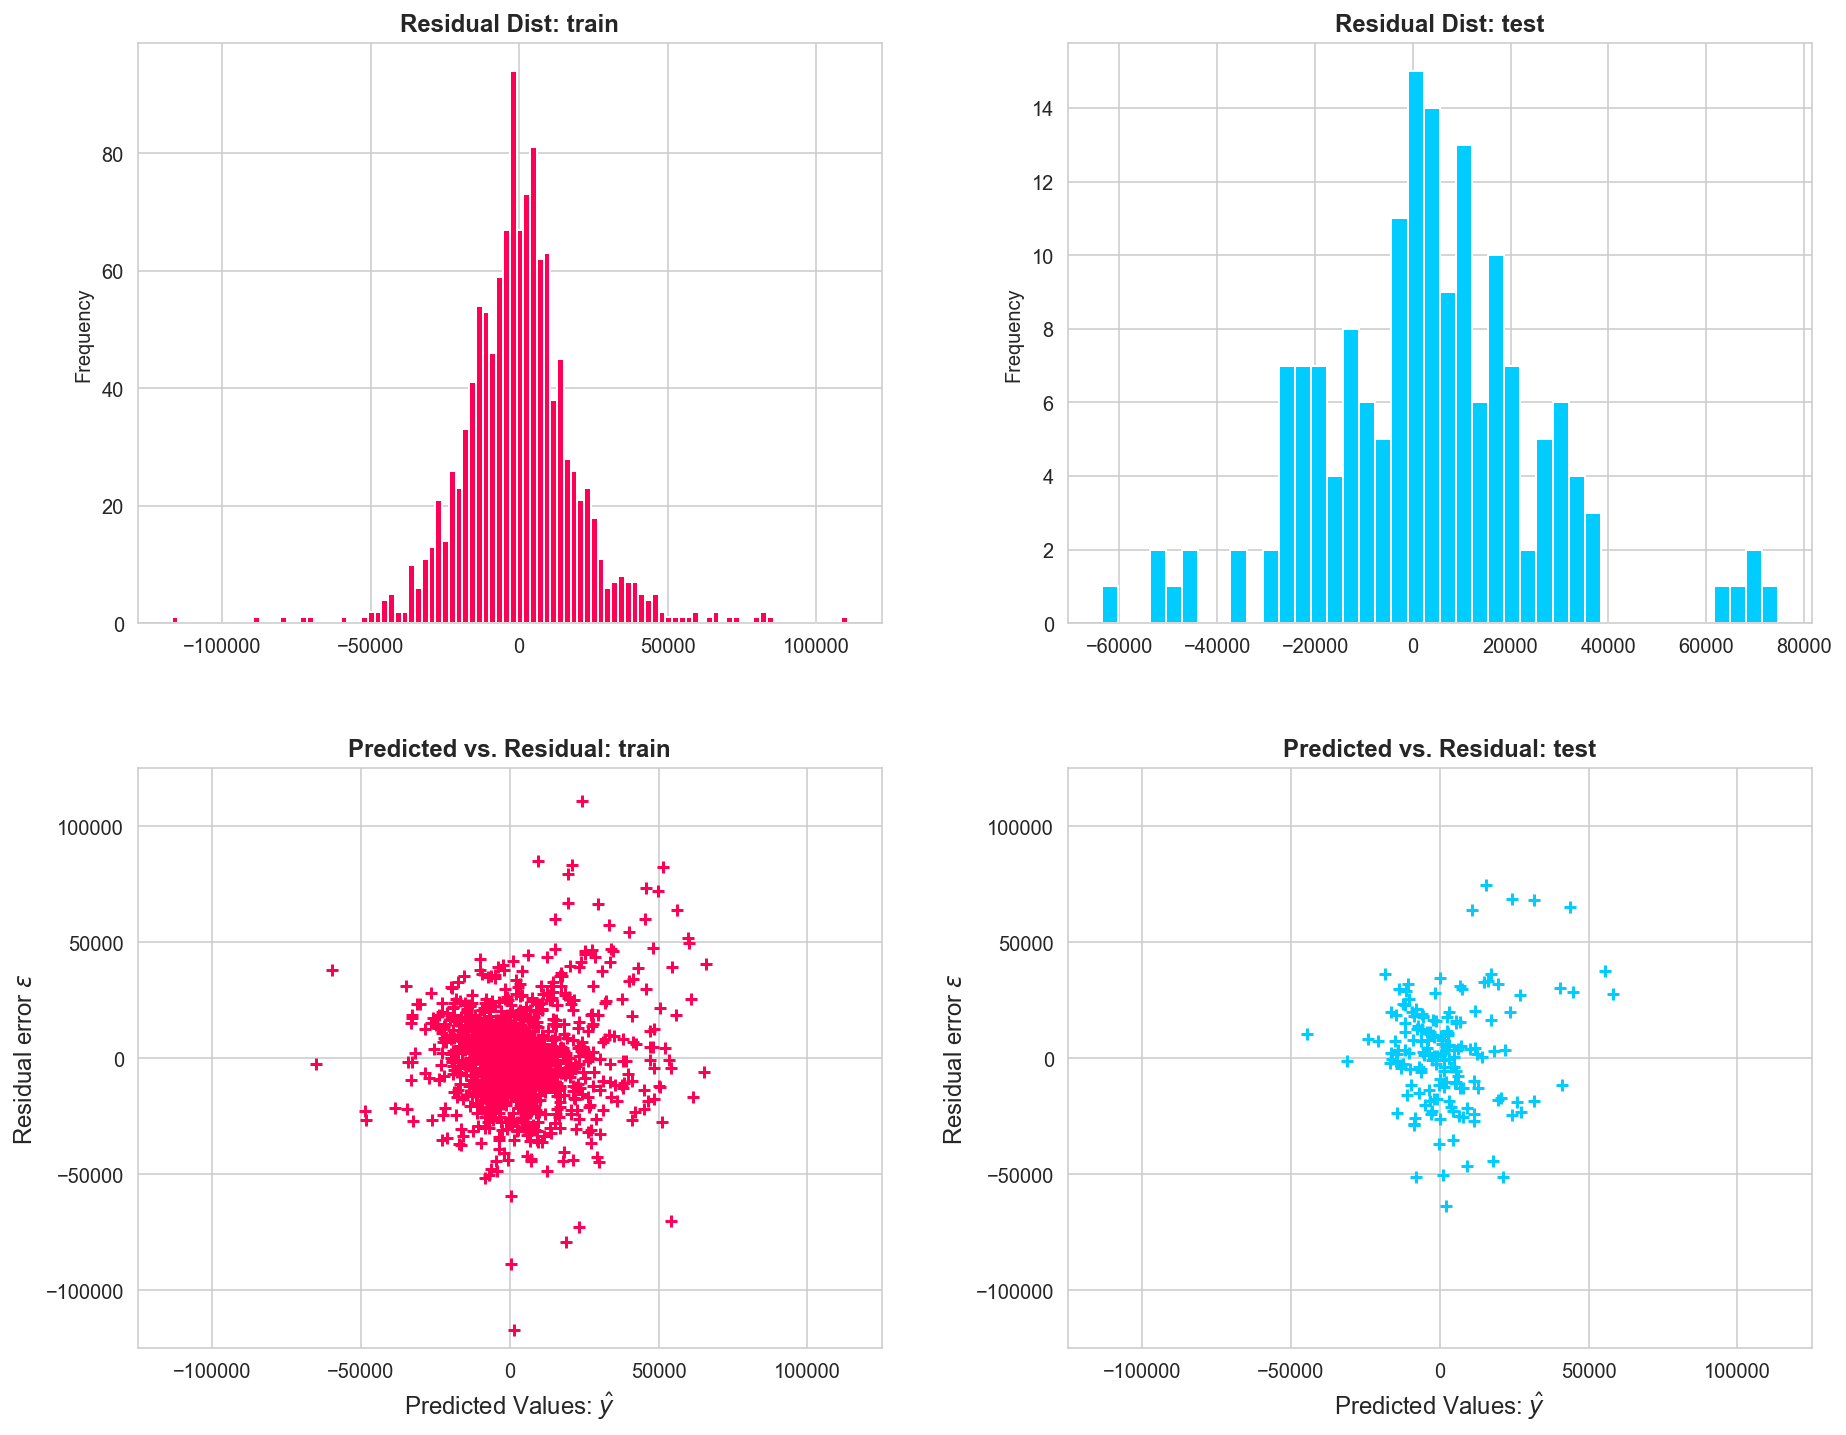

Model Test performance statistics:
----------------------------------
Mean residual error ε:    2606.8
St Dev residual error ε:  22617.2
RMSE:                     22766.94
Explained VAR:            0.375


In [113]:
# plot out the residuals 
# assign fig and axis vars for subplot
fig, axs = plt.subplots(2, 2, figsize=(15,12))

# distribution plots of the residuals for Train/Test
df_resid_train_res['Resid'].plot(kind='hist', bins=100, ax=axs[0,0], color = '#ff0055')
df_resid_test_res['Resid'].plot(kind='hist', bins=42, ax=axs[0,1], color = '#00ccff')

# scatter plots of the residuals vs predicted for Train/Test
axs[1,0].scatter(x=df_resid_train_res['Prediction'], y=df_resid_train_res['Resid'], color = '#ff0055', marker='+')
axs[1,1].scatter(x=df_resid_test_res['Prediction'], y=df_resid_test_res['Resid'], color = '#00ccff', marker='+')

# set the axis limits of second residual scatter to allow quick comp against
axs[1,0].set_xlim(-125000,125000)
axs[1,0].set_ylim(-125000,125000)
axs[1,1].set_xlim(-125000,125000)
axs[1,1].set_ylim(-125000,125000)


axs[0,0].set_title('Residual Dist: train',fontsize=12, fontweight='bold')
axs[0,1].set_title('Residual Dist: test',fontsize=12, fontweight='bold')
axs[1,0].set_title('Predicted vs. Residual: train',fontsize=12, fontweight='bold')
axs[1,1].set_title('Predicted vs. Residual: test',fontsize=12, fontweight='bold')

axs[1,0].set_xlabel('Predicted Values: $\hat{y}$',fontsize=12)
axs[1,0].set_ylabel('Residual error $\epsilon$',fontsize=12)
axs[1,1].set_xlabel('Predicted Values: $\hat{y}$',fontsize=12)
axs[1,1].set_ylabel('Residual error $\epsilon$',fontsize=12)

plt.subplots_adjust(wspace=0.25, hspace=0.25)     #modify the spacing between the plot

plt.show();

print("Model Test performance statistics:")
print("----------------------------------")
print("Mean residual error \u03B5:   ", round(np.mean(resid_test_res),1))
print("St Dev residual error \u03B5: ", round(np.std(resid_test_res),1))
print("RMSE:                    ", round(np.sqrt(mean_squared_error(y_r_test, y_hat_res)),2))
print("Explained VAR:           ", round(explained_variance_score(y_r_test, y_hat_res),3))

**************************************
### Discussion notes:
 - Error distriubtion is fairly normal for the Train data, and approximating towards normal for Test data. There is not a clear skew to the data, at least visually.   
 - Scatter plots do not seem to indicate underlying signal in the residuals, however there are some outliers that could be a cause for concern. This may just be residual noise in the data.     
 - The Train and Test R² values are very similar which suggests little variance in the model performance, and a good fit (no under/over fitting).
 - When looking at the predicted vs actual plot, there still appears to be a bias in the model under-predicting higher residual values. This may relate to the bias in the Fixed model.
 - The Explained Variance of the test model is similar to the R² value, which indicates that the underlying skew in the residuals is not severe and a relatively low mean error term.
 
 
 
 - **Do I trust this model?**
     - Vaguely...there is still a lot of noise in the leftover data but the model is narrowing in on some residual signal.
     - the model is targetting the residuals from the Fixed model and appears to have found some signal remaining.
     - the predicted indicators for added value all align with my understanding of the domain, and would make sense from an investment perspective.
     - there is likely room for improvement, however this is more likely subject to the same issues present in the Fixed Features model, so improvements there will cascade into this one.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.


 


In [73]:
# copy the cleaned Dataset
class_df = house_clean.copy()
class_df.head()
print(class_df.shape)

(1382, 76)


In [74]:
class_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'Scree

In [75]:
# reorder the col names for ease

cols = ['Id', 'SaleCondition', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SalePrice']

class_df = class_df[cols]
class_df.head()

,Id,SaleCondition,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,1,Normal,60,RL,65.0,8450,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NA,Attchd,2003.0,RFn,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,208500
1,2,Normal,20,RL,80.0,9600,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,1976.0,RFn,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,181500
2,3,Normal,60,RL,68.0,11250,NA,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,2001.0,RFn,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,223500
3,4,Abnorml,70,RL,60.0,9550,NA,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,1998.0,Unf,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,140000
4,5,Normal,60,RL,84.0,14260,NA,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,2000.0,RFn,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,250000


*********************************************************
## Part 3.1: Data set modifications
 - Check the current data set.
 - re-sample classes as needed to rebalance the data set.

In [76]:
# check the proportion of each Sale Condition class in the dataset
# There is a massive class imbalance that could be problematic

class_df['SaleCondition'].value_counts(normalize=True)

Normal     0.829957
Partial    0.078148
Abnorml    0.068017
Family     0.013748
Alloca     0.007236
AdjLand    0.002894
Name: SaleCondition, dtype: float64

In [77]:
# Slice out the Abnormal sales into a fresh DF
class_resamp = class_df[class_df['SaleCondition'] == 'Abnorml']
class_resamp.shape

(94, 76)

In [78]:
# UP sample the low volume Classes so that there is a decent amount to be able to split out a test set
# Without up-sampling, there would not be enough of these classes to ensure decent proportions in the Train/Test split

# create list of the low volume classes
conditions = ['Family', 'Alloca', 'AdjLand']

# Loop through the list of classes and randomly sample up to 30 data points.
for i, j in enumerate(conditions):
    for k in range(30):
        tmp = class_df[class_df['SaleCondition'] == j].sample(n=1, replace=True)
        class_resamp = class_resamp.append(tmp,ignore_index=True)            #append to the DF with the Abnormal data


In [79]:
# grab a random sample of 100 datapoints from the Normal Dataset
norm = class_df[class_df['SaleCondition'] == 'Normal'].sample(n=100, random_state=44)
class_resamp = class_resamp.append(norm,ignore_index=True)     #append to the DF with the Abnormal data

In [80]:
# add in all of the Partial condition data and append to the DF with the Abnormal data
class_resamp = class_resamp.append(class_df[(class_df['SaleCondition'] == 'Partial')],ignore_index=True)

In [81]:
# check the shape of the resampled DF
class_resamp.shape

(392, 76)

In [82]:
# check sizes of each class in resampled DF
class_resamp['SaleCondition'].value_counts()

Partial    108
Normal     100
Abnorml     94
AdjLand     30
Family      30
Alloca      30
Name: SaleCondition, dtype: int64

In [83]:
# Calc proportions of each class
class_resamp['SaleCondition'].value_counts(normalize=True)

Partial    0.275510
Normal     0.255102
Abnorml    0.239796
AdjLand    0.076531
Family     0.076531
Alloca     0.076531
Name: SaleCondition, dtype: float64

### Notes:
- baseline accuracy for the classification based on resmapled dataset = 27.5%

In [84]:
# DF is currently very ordered due to the method I've employed to generate the samples. 
# A highly ordered DF may accidently lead to imbalanced sets when splitting for Train/Test or
# cross-validating.
# Will shuffle the DF rows to avoid any unwanted order.

class_resamp = class_resamp.sample(frac=1).reset_index(drop=True)
class_resamp.shape

(392, 76)

*********************************************************
## Part 3.2: Model attempt A

 - Multiple class approach with resampled dataset

In [86]:
# list out the variables to dummy for this feature set

# list out Features that need to be dummied
to_dummy_cl = ['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
            'HouseStyle', 'Foundation', 'PavedDrive', 'MiscFeature','MiscVal', 'SaleType', 'MoSold',
            'Alley', 'LandContour', 'LandSlope', 'BsmtQual', 'BsmtExposure', 'GarageType', 'RoofStyle', 'RoofMatl', 
            'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtFinType1', 
            'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
            'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']

class_resamp_d = pd.get_dummies(data=class_resamp, columns=to_dummy_cl, prefix_sep='_', drop_first=True)
print(class_resamp_d.shape)
class_resamp_d.head()

(392, 243)


,Id,SaleCondition,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SalePrice,MSSubClass_30,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,PavedDrive_P,PavedDrive_Y,MiscFeature_Shed,MiscVal_400,MiscVal_620,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,Alley_NA,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofMatl_Tar&Grv,RoofMatl_WdShake,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PoolQC_NA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA
0,1450,Abnorml,21.000000,1533,5,7,1970,1970,0.0,553,0,77,Y,630,0,0,630,1,0,1,0,1,1,0,0.0,0,0,0,0,0,0,0,2006,92000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0

In [87]:
# Feature engineer Central air and convert to binary; 1 = YES, 0 = NO
class_resamp_d['CentralAir'] = class_resamp_d['CentralAir'].apply(lambda i: 1 if i =='Y' else 0)

In [88]:
#create Feature set and target var
y_class = class_resamp_d['SaleCondition']

X_class = class_resamp_d.iloc[:,2:]

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn import svm

from sklearn.metrics import confusion_matrix, classification_report

In [90]:
# Split the data into Train/Test with 1/3 for the Test portion
X_cl_train, X_cl_test, y_cl_train, y_cl_test = train_test_split(X_class, y_class, test_size=0.333, stratify=y_class)

# Check the resultant shapes to ensure appropriate split
print(X_cl_train.shape, y_cl_train.shape)
print(X_cl_test.shape, y_cl_test.shape)

(261, 241) (261,)
(131, 241) (131,)


In [91]:
# standardise the Feature set
# initialize the Scaler
ss_cl = StandardScaler()

# Fit the data using the scaler (scale the data)
X_cl_train_st = ss_cl.fit_transform(X_cl_train)

# transform the test Feature variable set
X_cl_test_st = ss_cl.transform(X_cl_test)

In [156]:
#set up a Logistic Regressor with crossval
lr = LogisticRegressionCV(cv=10, max_iter=1000)

# fit the logistic model to the train data
classed = lr.fit(X_cl_train_st, y_cl_train)


In [157]:
# Score the model on the test data
classed.score(X_cl_test_st,y_cl_test)

0.732824427480916

***********************************************
 - The model score output appears good, but this is just the overall accuracy. Need to look deeper to understand how the model does with classification of the sub-classes

In [94]:
# create prediction values on the X test set
y_hat_cl = classed.predict(X_cl_test_st)

In [95]:
# create the confusion matrix for some good ol' fashioned confusing times....
conmat = confusion_matrix(y_cl_test, y_hat_cl)

#chuck it into a Pandas DF so that its easier to read. Add in Condition classes
conf = pd.DataFrame(conmat, index=classed.classes_, columns=classed.classes_)
conf

,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Abnorml,15,0,0,2,13,1
AdjLand,0,10,0,0,0,0
Alloca,0,0,10,0,0,0
Family,1,0,1,7,1,0
Normal,14,0,0,0,20,0
Partial,2,0,0,0,0,34


___________________________________________________________
#### "Understanding" the Conf matrix: Revision on my understanding
 - Predictions across top
 - Actuals over rows
 - RESULTS:
     - upper right corner == False Negatives
     - lower left corner == Flase Positives
-----------------------------------------------------------

In [96]:
# create and print the classification report.
print(classification_report(y_cl_test, y_hat_cl))

              precision    recall  f1-score   support

     Abnorml       0.47      0.48      0.48        31
     AdjLand       1.00      1.00      1.00        10
      Alloca       0.91      1.00      0.95        10
      Family       0.78      0.70      0.74        10
      Normal       0.59      0.59      0.59        34
     Partial       0.97      0.94      0.96        36

    accuracy                           0.73       131
   macro avg       0.79      0.79      0.79       131
weighted avg       0.74      0.73      0.73       131



#### Interpretation:
 - The overall accuracy score is not too bad, however this is largely swayed by the high accuracy of classifying the smaller volume classes.
 - Classification performance of the Abnormal class is not great, with an F1 score of ~50%.
 - Confusion Matrix shows a large portion of both False Positives and False Negatives.
 - Model is not performing well enough to trust the classifications.

*********************************************************
## Part 3.3: Model attempt B

 - Binary class approach with resampled dataset
 - Will reduce dataset down to include Normal and Abnormal classes only

In [116]:
## grab the Abnormal and sampled Normal class data

# Slice out the Abnormal sales into a fresh DF
class_bin = class_df[class_df['SaleCondition'] == 'Abnorml']

# grab a random sample of 94 datapoints from the Normal Dataset
norm_bin = class_df[class_df['SaleCondition'] == 'Normal'].sample(n=94, random_state=42)
class_bin = class_bin.append(norm_bin,ignore_index=True)     #append to the DF with the Abnormal data

# Shuffle the DF rows to avoid any unwanted order.
class_bin = class_bin.sample(frac=1).reset_index(drop=True)
class_bin.shape


(188, 76)

In [118]:
# Dummy the Feature vars based on the same list of Features from Part 3.2

class_bin_d = pd.get_dummies(data=class_bin, columns=to_dummy_cl, prefix_sep='_', drop_first=True)

# Feature engineer Central air and convert to binary; 1 = YES, 0 = NO
class_bin_d['CentralAir'] = class_bin_d['CentralAir'].apply(lambda i: 1 if i =='Y' else 0)

print(class_bin_d.shape)
class_bin_d.head()

(188, 241)


,Id,SaleCondition,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SalePrice,MSSubClass_30,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Foundation_CBlock,Foundation_PConc,Foundation_Slab,PavedDrive_P,PavedDrive_Y,MiscFeature_Shed,MiscVal_400,MiscVal_450,MiscVal_500,MiscVal_620,SaleType_CWD,SaleType_ConLD,SaleType_ConLI,SaleType_Oth,SaleType_WD,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,Alley_NA,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofMatl_Tar&Grv,RoofMatl_WdShake,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,Electrical_FuseF,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA
0,1094,Normal,71.000000,9230,5,8,1965,1998,166.0,661,0,203,1,1200,0,0,1200,1,0,1,1,1,1,0,1977.0,884,0,64,0,0,0,0,2006,146000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0

In [119]:
#create Feature set and target var
y_bin = class_bin_d['SaleCondition']
X_bin = class_bin_d.iloc[:,2:]


# Split the data into Train/Test with 1/3 for the Test portion
X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(X_bin, y_bin, test_size=0.333, stratify=y_bin)

# Check the resultant shapes to ensure appropriate split
print(X_bin_train.shape, y_bin_train.shape)
print(X_bin_test.shape, y_bin_test.shape)

(125, 239) (125,)
(63, 239) (63,)


In [120]:
# standardise the Feature set
# initialize the Scaler
ss_bin = StandardScaler()

# Fit the data using the scaler (scale the data)
X_bin_train_st = ss_bin.fit_transform(X_bin_train)

# transform the test Feature variable set
X_bin_test_st = ss_bin.transform(X_bin_test)

********************************************
## Check Logistic Regression with Lasso penalty

 - additional penality included to optimise Feature set to improve performance.
 - Solver changed for the Lasso penalty option
 - a number of 'C' values manually tested to improve outcome.

In [215]:
#set up a Logistic Regressor with crossval
lr = LogisticRegressionCV(penalty='l1', Cs=13, cv=10, max_iter=1000, solver='liblinear')

# fit the logistic model to the train data
binary = lr.fit(X_bin_train_st, y_bin_train)

# Score the model on the test data
binary.score(X_bin_test_st, y_bin_test)

0.6507936507936508

In [216]:
# create prediction values on the X test set
y_hat_bin = binary.predict(X_bin_test_st)
y_hat_bin_pp = binary.predict_proba(X_bin_test_st)

# create the confusion matrix for some good ol' fashioned confusing times....
conmat_bin = confusion_matrix(y_bin_test, y_hat_bin)

#chuck it into a Pandas DF so that its easier to read. Add in Condition classes
conf_bin = pd.DataFrame(conmat_bin, index=binary.classes_, columns=binary.classes_)
conf_bin

,Abnorml,Normal
Abnorml,20,11
Normal,11,21


In [189]:
#y_hat_bin_pp

pp = pd.DataFrame(y_hat_bin_pp, columns=['Abnormal','Normal'])
pp.head()

,Abnormal,Normal
0,0.169427,0.830573
1,0.275046,0.724954
2,0.192391,0.807609
3,0.574697,0.425303
4,0.205693,0.794307


In [190]:
# create and print the classification report.
print(classification_report(y_bin_test, y_hat_bin))

              precision    recall  f1-score   support

     Abnorml       0.65      0.65      0.65        31
      Normal       0.66      0.66      0.66        32

    accuracy                           0.65        63
   macro avg       0.65      0.65      0.65        63
weighted avg       0.65      0.65      0.65        63



### Interpretation:
 - Reducing the problem down to just two classes has improved the classification of the Abnormal class compared to the multi class, however the overall accuracy score is still not amazing.
 - Classification performance of the Abnormal class is not great, with an F1 score of ~65%.
 - Confusion Matrix still shows a large portion of both False Positives and False Negatives -- approx 1/3 of the test data is mis-classified.
     - modifying the 'C' value was tested to reduce the number of FP/FN values.
     - in practice, False Negatives (i.e. Normal classified as Abnormal) would be more detrimental.
 - Model is not performing well enough to fully trust the classifications.

In [130]:
from sklearn.metrics import roc_curve, auc

In [191]:
# Convert str target values to binary for plotting
# 1 = Normal, 0 = Abnormal
ytest_bin_list = [1 if x == 'Normal' else 0 for x in y_bin_test]
#ytest_bin_list

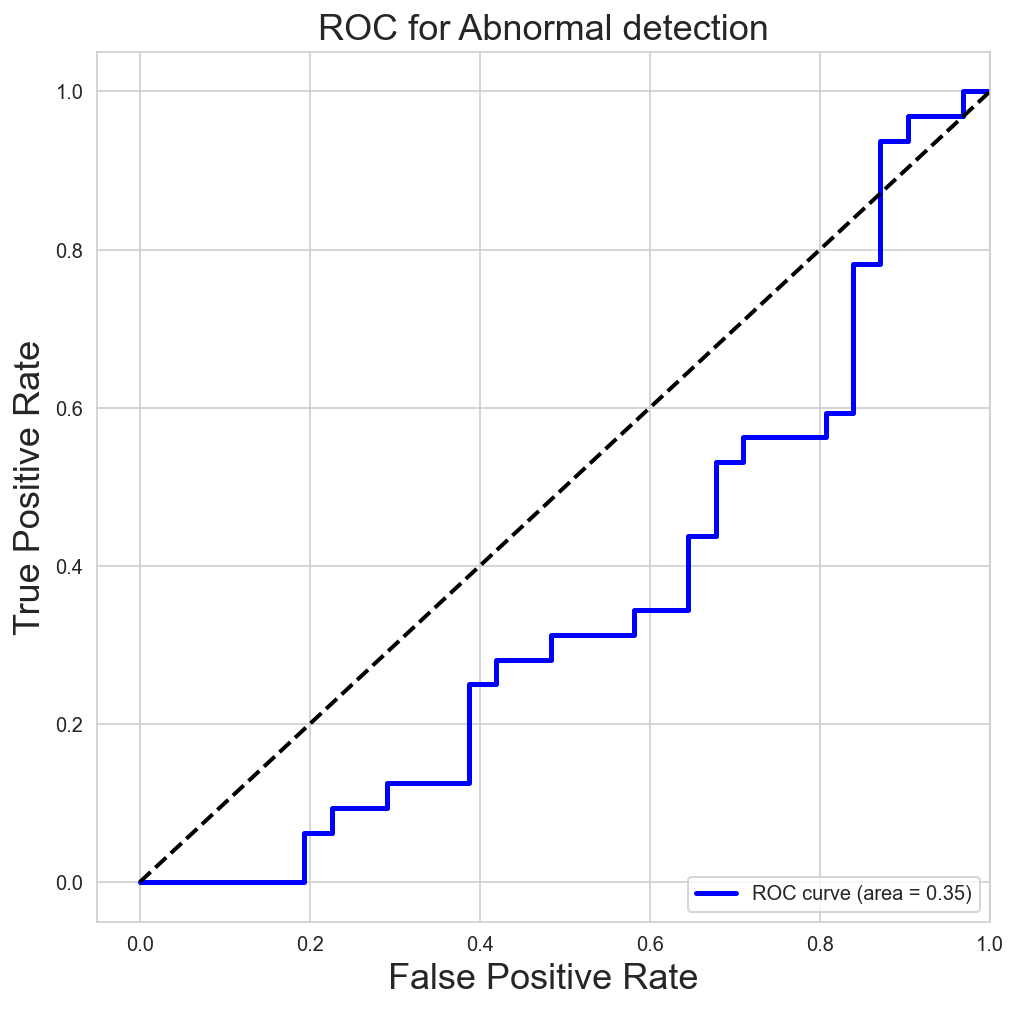

In [193]:
# For class Abnormal, find the area under the curve
fpr, tpr, _ = roc_curve(ytest_bin_list, y_hat_bin_pp[:,0])
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class Abnormal
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=2.5, color='blue')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for Abnormal detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### Discussion notes:

- Full disclosure, not 100% sure what the ROC curve is telling me other than it's not a great result.
- Something I need to research more...